In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트(NanumGothic) 설치
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

# Matplotlib의 기본 폰트 설정
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# NanumGothic 폰트 경로 확인 및 적용
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib의 폰트 캐시 삭제 후 업데이트
fm.fontManager.addfont(font_path)  # 폰트 추가
plt.rc("font", family="NanumGothic")

print("한글 폰트 설정 완료!")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
한글 폰트 설정 완료!


# 데이터로드

In [3]:
df=pd.read_excel("/content/drive/MyDrive/LIKELION_데이터분석/finalproject/plz.xlsx")
df.head()

,Unnamed: 0,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,latitude,longitude,city,success,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound,natlty1_txt,gname
0,41069,199001000001,1990,1,0,Lebanon,Middle East & North Africa,Beirut,33.888523,35.503513,Matnzas,1,Hostage Taking (Kidnapping),Journalists & Media,Firearms,0.0,0,Lebanon,Unknown
1,41070,199001010001,1990,1,1,India,South Asia,Jammu and Kashmir,34.08374,74.789902,Tucata,1,Bombing/Explosion,Government (General),Explosives,0.0,0,India,Unknown
2,41071,199001010002,1990,1,1,India,South Asia,Jammu and Kashmir,34.08374,74.789902,Janajanea,1,Bombing/Explosion,Business,Explosives,0.0,0,India,Unknown
3,41072,199001010003,1990,1,1,India,South Asia,Jammu and Kashmir,34.08374,74.789902,Junin district,1,Bombing/Explosion,Transportation,Explosives,0.0,0,India,Unknown
4,41073,199001010004,1990,1,1,Bolivia,South America,Cochabamba,-17.382789,-66.166439,Junin,1,Bombing/Explosion,Religious Figures/Institutions,Explosives,0.0,0,United States,Alejo Calatayu


## 필요한 컬럼만 추출(19개)

In [4]:
columns_to_extract = [
    'eventid',
    'iyear', 'imonth', 'iday',
    'country_txt', 'region_txt', 'provstate',
    'latitude', 'longitude', 'city', 'success',
    'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt',
    'nkill', 'nwound', 'natlty1_txt','gname'
]

df=df[columns_to_extract]

# 데이터 탐색

In [5]:
df.shape

(173597, 18)

In [6]:
df.isnull().sum()

,0
eventid,0
iyear,0
imonth,0
iday,0
country_txt,0
region_txt,0
provstate,0
latitude,0
longitude,0
city,0


In [7]:
df['success'].unique()

array([1, 0])

In [8]:
df.describe()

,eventid,iyear,imonth,iday,success,nkill,nwound
count,1.735970e+05,173597.000000,173597.000000,173597.000000,173597.000000,173597.000000,173597.000000
mean,2.010541e+11,2010.475602,6.385727,15.589526,0.873990,2.489170,3.290235
std,8.709189e+08,8.710555,3.379845,8.792427,0.331862,11.443061,42.535968
min,1.990010e+11,1990.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007101e+11,2007.000000,4.000000,8.000000,1.000000,0.000000,0.000000
50%,2.014022e+11,2014.000000,6.000000,15.000000,1.000000,1.000000,0.000000
75%,2.016122e+11,2016.000000,9.000000,23.000000,1.000000,2.000000,3.000000
max,2.021073e+11,2021.000000,12.000000,31.000000,1.000000,1700.000000,10878.000000


In [9]:
df.describe(include=['O'])

,country_txt,region_txt,provstate,latitude,longitude,city,attacktype1_txt,targtype1_txt,weaptype1_txt,natlty1_txt,gname
count,173597,173597,173597,173597,173597,173597,173597,173597,173597,173597,173597
unique,193,12,2474,62082,61800,38948,9,22,12,206,2629
top,Iraq,Middle East & North Africa,Baghdad,33.303567,44.371771,Baghdad,Bombing/Explosion,Private Citizens & Property,Explosives,Iraq,Unknown
freq,28032,55541,8130,4646,4646,8041,81532,46789,87103,25754,81456


In [10]:
# 중복 행 확인
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173597 entries, 0 to 173596
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          173597 non-null  int64  
 1   iyear            173597 non-null  int64  
 2   imonth           173597 non-null  int64  
 3   iday             173597 non-null  int64  
 4   country_txt      173597 non-null  object 
 5   region_txt       173597 non-null  object 
 6   provstate        173597 non-null  object 
 7   latitude         173597 non-null  object 
 8   longitude        173597 non-null  object 
 9   city             173597 non-null  object 
 10  success          173597 non-null  int64  
 11  attacktype1_txt  173597 non-null  object 
 12  targtype1_txt    173597 non-null  object 
 13  weaptype1_txt    173597 non-null  object 
 14  nkill            173597 non-null  float64
 15  nwound           173597 non-null  int64  
 16  natlty1_txt      173597 non-null  obje

In [12]:
#중복 제거 전 행 수 확인
print(f"중복 제거 전: {df.shape[0]} rows")

#'eventid'와 'Unnamed: 0' 제외한 컬럼 기준으로 중복 제거
df = df.drop_duplicates(subset=[col for col in df.columns if col not in ['eventid', 'Unnamed: 0']])

#중복 제거 후 행 수 확인
print(f"중복 제거 후: {df.shape[0]} rows")

#'Unnamed: 0' 컬럼 삭제
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

중복 제거 전: 173597 rows
중복 제거 후: 167685 rows


<ipython-input-12-b724b2f8e940>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


# 가설설정

## 가설 1. 기술의 발전에 따라 무기사용의 양상이 변화할것이다

- 기술의 발전에 따라 첨단..(?) 무기들이 많이 나올듯 EX) 폭발물 같은?

**iyear이 수치형일 때, 범주형일 때**
- 매년 데이터가 필요한 경우
    - 역사적 사건의 영향이 필요할 때,
    - 예: 2001년 911테러 / 2011년 아랍의 봄
    - 머신러닝 예측 모델에서 시간 흐름 변수로 쓸 때

- 1990년대, 2000년대같이 년대별 데이터가 필요한 경우
    - 패턴에 유의미한 변화가 있는지
    - 단계적 흐름이 있는지 보고 싶을 때

➡️ 내가 보고 싶은건 년도별 패턴이 있는지이기 때문에, 해당 가설 검증에서는 decade변수를 만들어서 해보고, iyear은 보존해서 나중에 시계열 분석에 활용하기로 함    

In [13]:
df['decade'] = (df['iyear'] // 10) * 10

<ipython-input-13-ea2a5cde0f80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['iyear'] // 10) * 10


In [14]:
df['weaptype1_txt'] = df['weaptype1_txt'].replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle'
)

<ipython-input-14-f177e4421bad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weaptype1_txt'] = df['weaptype1_txt'].replace(


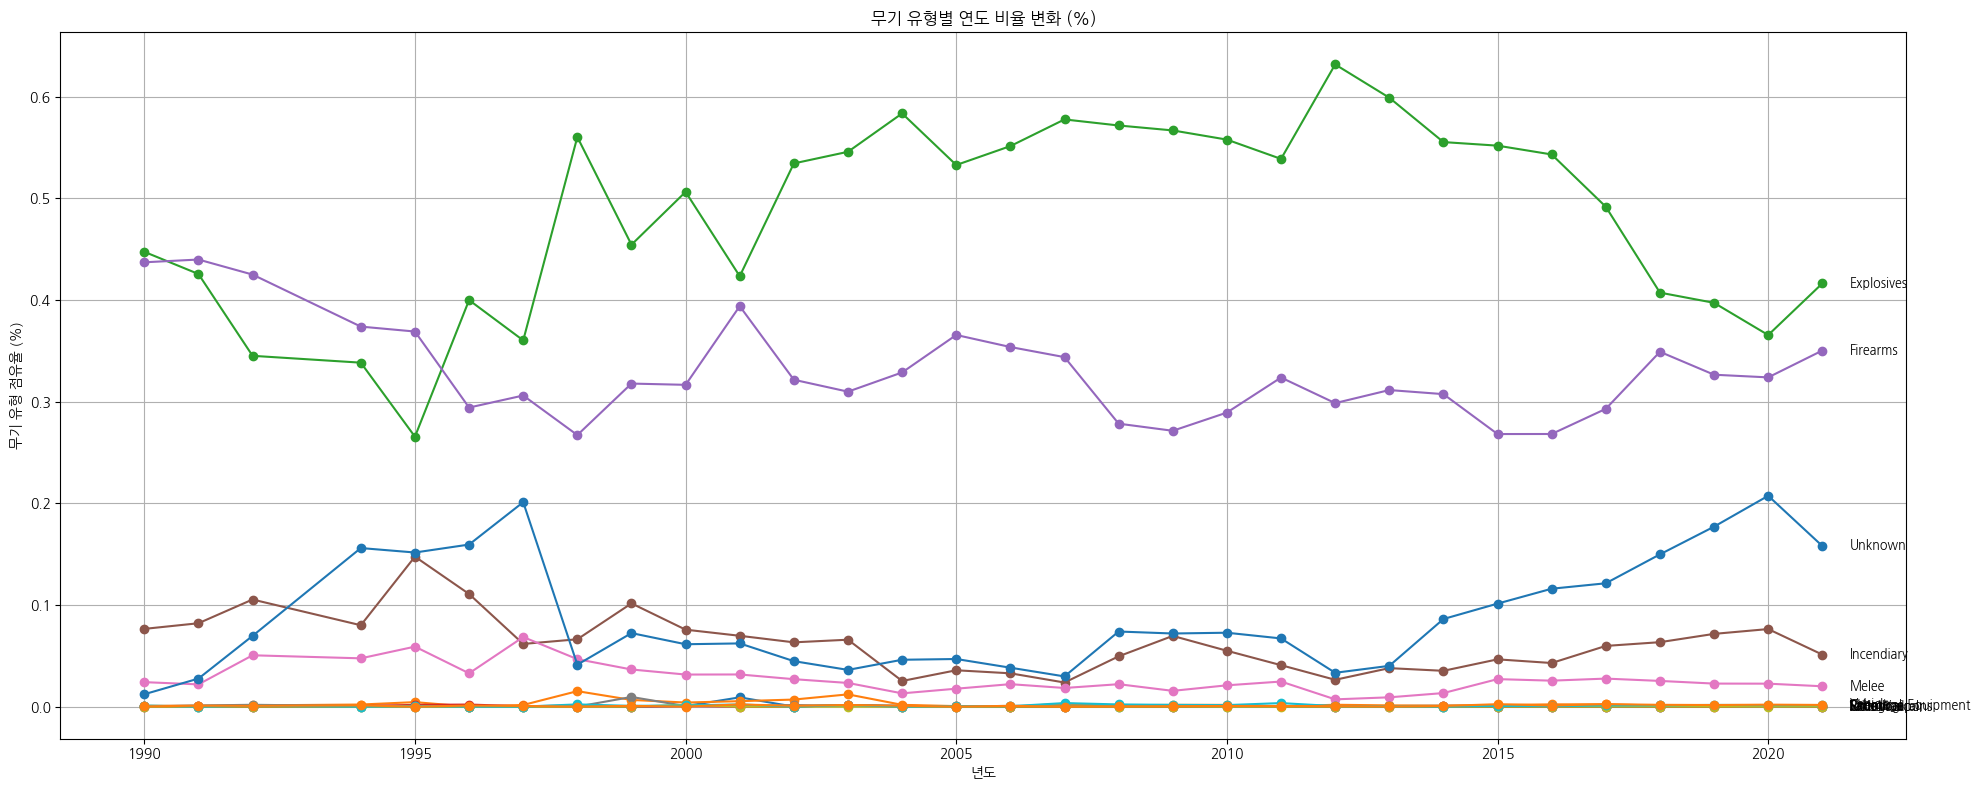

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 연도별 무기 유형 빈도표 만들기
weapon_year_ct = pd.crosstab(df['iyear'], df['weaptype1_txt'])

# 2. 연도별 비율 계산
weapon_ratio = weapon_year_ct.div(weapon_year_ct.sum(axis=1), axis=0)

# 3. 선 그래프 그리기
plt.figure(figsize=(20, 8))

for weapon in weapon_ratio.columns:
    y_values = weapon_ratio[weapon]
    x_values = weapon_ratio.index

    # 선 그리기
    plt.plot(x_values, y_values, label=weapon, marker='o')

    # 마지막 지점에 레이블 붙이기
    plt.text(x_values[-1] + 0.5, y_values.iloc[-1], weapon,
             fontsize=9, va='center')

plt.title("무기 유형별 연도 비율 변화 (%)")
plt.xlabel("년도")
plt.ylabel("무기 유형 점유율 (%)")
plt.tight_layout()
plt.grid(True)
plt.show()


In [16]:
weapon_decade_ct = pd.crosstab(df['decade'], df['weaptype1_txt']).T
weapon_decade_ct

decade,1990,2000,2010,2020
weaptype1_txt,,,,
Biological,2,21,6,1
Chemical,61,67,150,7
Explosives,10748,13403,54038,5046
Fake Weapons,17,5,6,2
Firearms,10664,7803,30637,4381
Incendiary,2621,1244,4773,880
Melee,1183,521,2056,284
Other,32,18,71,5
Radiological,0,3,0,0


In [17]:
# 카이제곱 검정(두 범주형 변수 간 독립성 검정)
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(weapon_decade_ct)

print(f"Chi-squared 통계량: {stat:.2f}")
print(f"p-value: {p:.5f}")
print(f"자유도: {dof}")

Chi-squared 통계량: 4969.35
p-value: 0.00000
자유도: 33


### 결론: 가설1
---
- 폭발물 테러는 계속해서 감소하다가 2020년대 이후에 들어 증가하고 있고,
- 총기류 테러는 증가와 감소추세를 반복하다가 최근에 들어서 다시 증가하고 있다.

 -> 정확한 증가원인에 대해서는 추가적인 조사가 필요할 듯

 -> 카이제곱 검정 결과, 기술 발전과 무기 사용 양상은 유의미한 관련이 있음을 확인

## 가설2 타겟에 따라서 무기 유형이 달라질것이다.

In [18]:
ct_target_weapon = pd.crosstab(df['targtype1_txt'], df['weaptype1_txt']).T
ct_target_weapon

targtype1_txt,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
weaptype1_txt,,,,,,,,,,,,,,,,,,,,,
Biological,0,1,3,1,0,1,12,6,0,1,...,0,4,0,0,0,1,0,0,0,0
Chemical,0,1,14,47,4,10,28,3,0,36,...,30,80,11,1,1,0,10,3,0,4
Explosives,19,467,8235,1971,140,1002,7760,548,109,13954,...,10999,20663,1966,400,1562,113,3353,6037,3012,581
Fake Weapons,0,16,4,0,0,2,4,0,0,0,...,0,2,0,0,0,1,1,0,0,0
Firearms,18,121,3097,930,54,806,8011,1128,127,9303,...,9832,14671,1341,71,1225,133,803,167,212,865
Incendiary,118,33,2130,516,20,171,1037,150,7,219,...,531,2446,736,409,34,21,673,39,70,108
Melee,6,26,196,72,0,64,329,152,6,337,...,400,2056,145,4,41,29,68,27,3,57
Other,0,0,12,12,0,2,11,7,0,4,...,13,52,9,0,0,0,1,0,1,1
Radiological,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


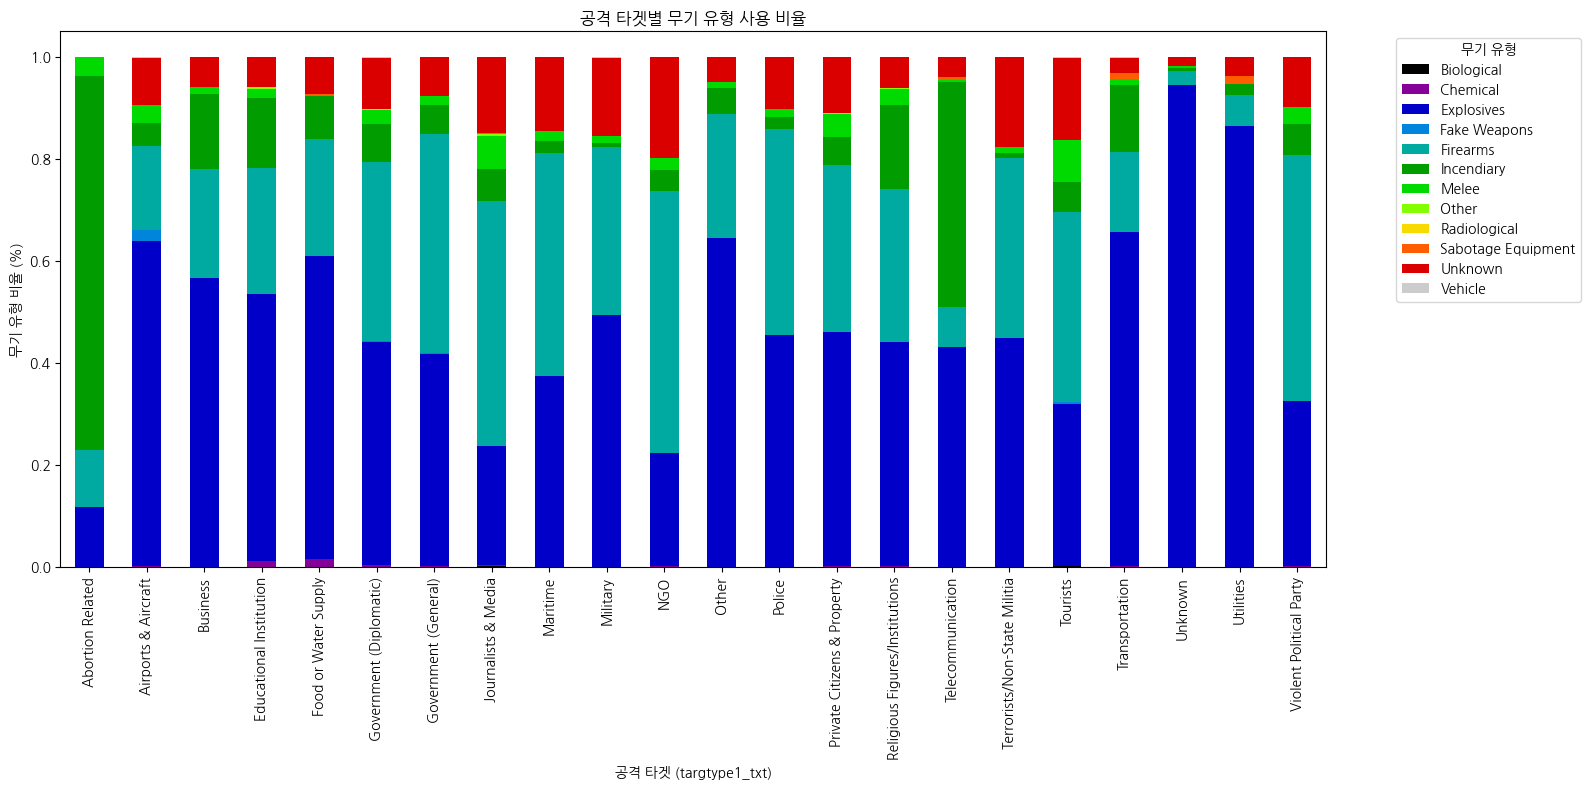

In [19]:
# 교차표: 타겟 × 무기
ct_target_weapon = pd.crosstab(df['targtype1_txt'], df['weaptype1_txt'])

# 비율 계산 (행 기준)
ct_target_weapon_ratio = ct_target_weapon.div(ct_target_weapon.sum(axis=1), axis=0)

# 시각화
ct_target_weapon_ratio.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 8),
    colormap='nipy_spectral'
)

plt.title("공격 타겟별 무기 유형 사용 비율")
plt.xlabel("공격 타겟 (targtype1_txt)")
plt.ylabel("무기 유형 비율 (%)")
plt.legend(title="무기 유형", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 눈에 띄는 3개의 무기유형 정리 - 가설2 시각화 해석

- 폭발물

    전 타겟에서 두루두루 사용되는 가장 흔한 무기 유형
    - 특히 공공시설, 교통수단, 공항 등에서 압도적 높은 비율을 차지

    ➡️ 인프라 파괴 / 대중들에 공포심, 충격 효과를 노린 목적이 커보임

- 총기류
    
    폭발물 못지 않게 모든 대상에 두루두루 사용되는 무기 유형
    - 정부, 언론사, 사회운동/인권 단체, 정치적 경쟁 세력 등등..
    
    ➡️ 단순 민간인 뿐만 아니라 정치사회적 타겟에 주로 사용함을쏘ㅓ 메시지를 전달하거나, 그 타겟을 제거하기 위한 수단으로 사용된듯 함.

- 방화
    
    특히 낙태관련 시설이나 통신 인프라를 대상으로 많이 나타난 테러 유형
    - 낙태와 관련된 시설의 경우에는 불을 질러 시설을 사용하지 못하도록, 불에 약한 통신장비들이 모여있는 통신인프라 같은 경우에도, 기능을 마비시키기 위해서 사용된것으로 보임

    ➡️ 메시지 전달 및 기능 마비 목적의 테러에 많이 사용되는 듯함

#### 총기류

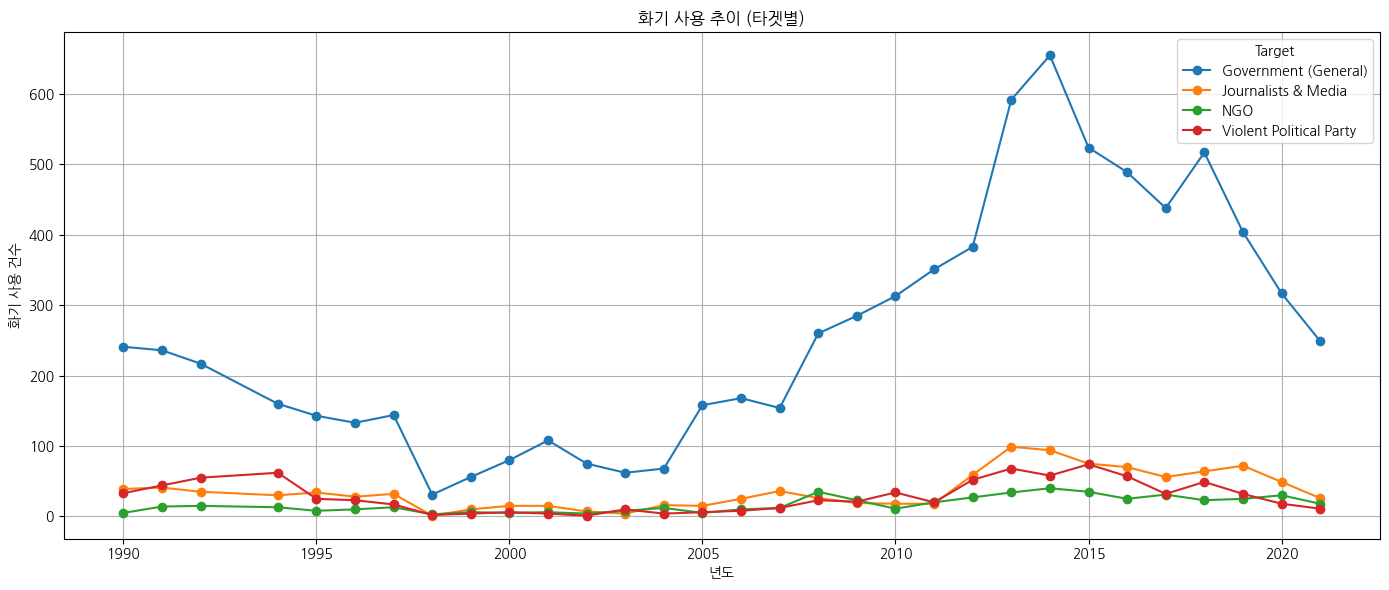

In [20]:
import matplotlib.pyplot as plt

# 1. 분석 대상 타겟 목록
focus_targets = [
    'Government (General)',
    'Journalists & Media',
    'NGO',
    'Violent Political Party'
]

# 2. Firearms 사용 건수만 필터링
firearms_df = df[df['weaptype1_txt'] == 'Firearms']

# 3. 타겟 × 연도별 건수 계산
firearms_yearly = firearms_df[firearms_df['targtype1_txt'].isin(focus_targets)] \
    .groupby(['iyear', 'targtype1_txt'])['eventid'].count().unstack().fillna(0)

# 4. 시각화
plt.figure(figsize=(14, 6))
for target in firearms_yearly.columns:
    plt.plot(firearms_yearly.index, firearms_yearly[target], label=target, marker='o')

plt.title("화기 사용 추이 (타겟별)")
plt.xlabel("년도")
plt.ylabel("화기 사용 건수")
plt.legend(title="Target")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# 1. 조건 필터링
mask = (
    (df['iyear'].between(2010, 2015)) &
    (df['weaptype1_txt'] == 'Firearms') &
    (df['targtype1_txt'] == 'Government (General)')
)

filtered = df[mask]

# 2. 주요 특징 요약 출력
print(f"🔍 총 사건 수: {len(filtered)}")

# 3. 테러 발생 국가 상위 10개
print("\n📍 정부 대상 총기테러 발생 국가 Top 10:")
print(filtered['country_txt'].value_counts().head(10))

# 4. 타겟 국적 상위 10개
print("\n🧭 타겟 국적 Top 10:")
print(filtered['natlty1_txt'].value_counts().head(10))


🔍 총 사건 수: 2818

📍 정부 대상 총기테러 발생 국가 Top 10:
country_txt
Iraq           428
Philippines    420
Pakistan       362
Afghanistan    357
India          232
Yemen          179
Nigeria        171
Somalia        139
Thailand       129
Libya           98
Name: count, dtype: int64

🧭 타겟 국적 Top 10:
natlty1_txt
Iraq           421
Philippines    420
Afghanistan    358
Pakistan       356
India          232
Yemen          178
Nigeria        171
Somalia        136
Thailand       129
Libya           99
Name: count, dtype: int64


대부분 분쟁이 잦았던 국가에서 집중적으로 나타나고 있고, 이를 통해 FIREARMS는 반정부 세력이나 테러그룹이 국가기관, 자국 정부를 표적으로 해서 제거하려는 목적의 테러에 많이 사용된다고 추측해볼 수 있다.

#### 방화

In [22]:
# Incendiary 무기 사용 테러만 추출
df_incendiary = df[df['weaptype1_txt'] == 'Incendiary']

print(f"🔥 Incendiary 테러 총 건수: {len(df_incendiary)}")
print('-' * 40)
print("🎯 타겟 대상 Top 10:")
print(df_incendiary['targtype1_txt'].value_counts().head(10))


🔥 Incendiary 테러 총 건수: 9518
----------------------------------------
🎯 타겟 대상 Top 10:
targtype1_txt
Private Citizens & Property       2446
Business                          2130
Government (General)              1037
Religious Figures/Institutions     736
Transportation                     673
Police                             531
Educational Institution            516
Telecommunication                  409
Military                           219
Government (Diplomatic)            171
Name: count, dtype: int64


In [23]:
print("🌍 테러 발생 국가 Top 10:")
print(df_incendiary['country_txt'].value_counts().head(10))


🌍 테러 발생 국가 Top 10:
country_txt
India             1069
United Kingdom     682
United States      518
Germany            475
Philippines        380
Pakistan           355
Afghanistan        352
Greece             331
Colombia           299
Nigeria            296
Name: count, dtype: int64


In [24]:
# 1. 조건 필터링
target_list = ['Abortion Related', 'Telecommunication']
# df_infra = df[
#     (df['weaptype1_txt'] == 'Incendiary') &  #
#     (df['targtype1_txt'].isin(target_list))
# ]

# 2. 타겟별 집계
summary = df.groupby('targtype1_txt').agg({
    'eventid': 'count',
    'nkill': 'mean',
    'nwound': 'mean'
}).rename(columns={
    'eventid': 'Attack Count',
    'nkill': 'Avg Killed',
    'nwound': 'Avg Wounded'
}).round(2)

# 3. 결과 출력
import pandas as pd
import IPython.display as disp

disp.display(summary)


,Attack Count,Avg Killed,Avg Wounded
targtype1_txt,,,
Abortion Related,161,0.06,0.24
Airports & Aircraft,734,2.05,2.19
Business,14548,1.49,3.36
Educational Institution,3772,1.05,2.78
Food or Water Supply,236,1.31,1.14
Government (Diplomatic),2294,1.36,4.52
Government (General),18622,1.49,2.30
Journalists & Media,2351,0.68,0.85
Maritime,291,2.73,2.28


### 가설 2 통계적 검정

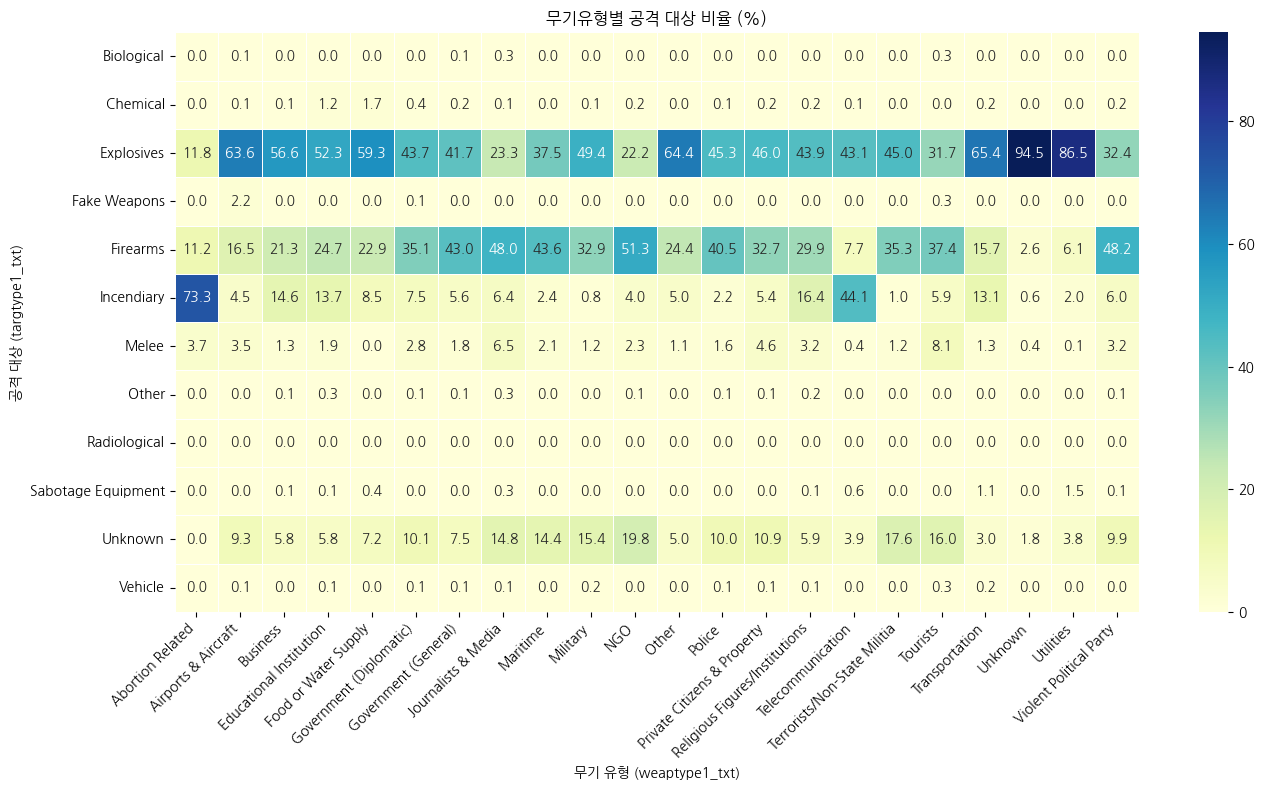

In [25]:
# 교차표 + 비율 계산
weapon_target_ratio = ct_target_weapon.div(ct_target_weapon.sum(axis=1), axis=0) * 100

# 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(weapon_target_ratio.T, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("무기유형별 공격 대상 비율 (%)")
plt.xlabel("무기 유형 (weaptype1_txt)")
plt.ylabel("공격 대상 (targtype1_txt)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:
# 4. 카이제곱 검정
stat, p, dof, expected = chi2_contingency(ct_target_weapon)

print(f"Chi-squared 통계량: {stat:.2f}")
print(f"p-value: {p:.5f}")
print(f"자유도: {dof}")

if p < 0.05:
    print("✅ 공격 타겟과 무기 유형 간 통계적으로 유의미한 관계 있음")
else:
    print("❌ 유의미한 관계 없음 (귀무가설 채택)")

Chi-squared 통계량: 28844.56
p-value: 0.00000
자유도: 231
✅ 공격 타겟과 무기 유형 간 통계적으로 유의미한 관계 있음


In [27]:
df[df['weaptype1_txt'] == 'Radiological']

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,latitude,longitude,city,success,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound,natlty1_txt,gname,decade
29443,200006060012,2000,6,6,Japan,East Asia,Tokyo,35.689125,139.747742,Tokyo,0,Unarmed Assault,Government (General),Radiological,0.0,0,Japan,Unknown,2000
29456,200006070008,2000,6,7,Japan,East Asia,Tokyo,35.689125,139.747742,Tokyo,0,Unarmed Assault,Government (General),Radiological,0.0,0,Japan,Unknown,2000
29469,200006080014,2000,6,8,Japan,East Asia,Tokyo,35.689125,139.747742,Tokyo,0,Unarmed Assault,Government (General),Radiological,0.0,0,Japan,Unknown,2000


- 원본 확인결과 세부 타깃이 모두 달라서 같은 날에 일어난 다른 장소에서의 테러임

- 인터넷 서칭 결과 이를 다룬 기사나 결과는 찾지 못함


### 결론: 가설2
두 변수간의 관계는 유의미함!!
여러 해석들이 가능해보임

## 가설 3. 지역마다 사용되는 테러 무기 유형이 다를 것이다

- 미국에서는 총기 테러가 많을 것 같고,
- 중동지역에서는 폭발물이 많을 것 같다

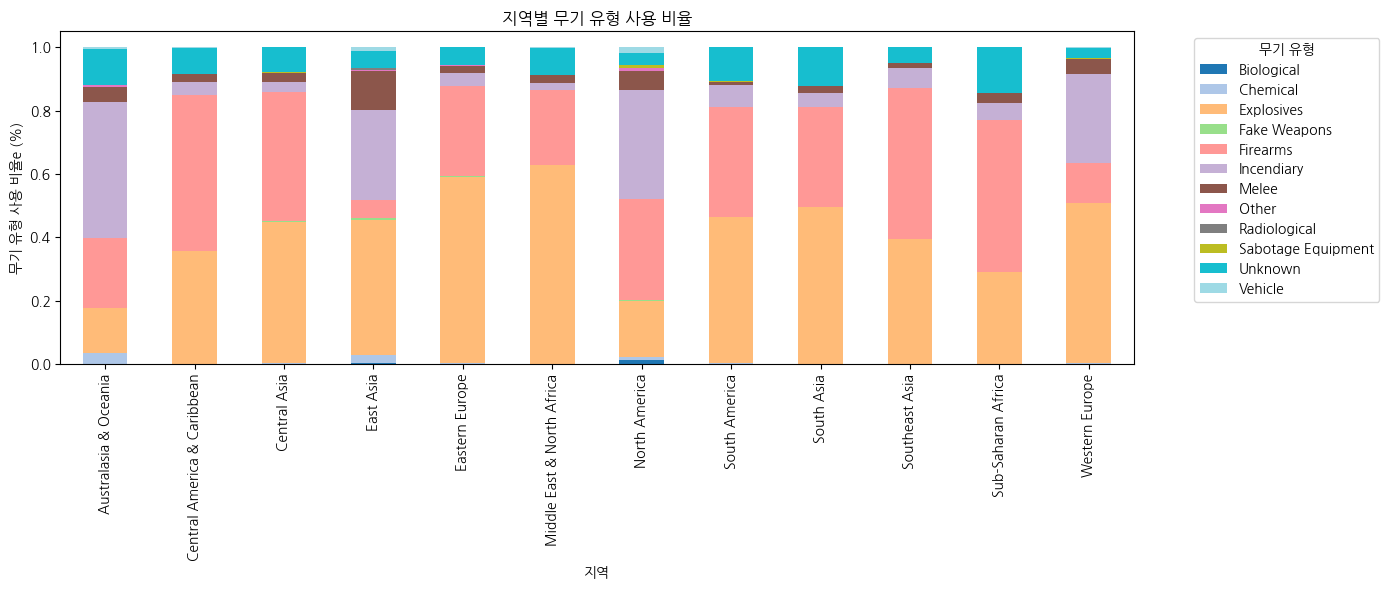

In [28]:
import matplotlib.pyplot as plt

# 교차표 만들기
ct_region_weapon = df.groupby(['region_txt', 'weaptype1_txt']).size().unstack(fill_value=0)

# 비율 변환 (행 기준)
ct_region_weapon_ratio = ct_region_weapon.div(ct_region_weapon.sum(axis=1), axis=0)

# 스택 바차트
ct_region_weapon_ratio.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("지역별 무기 유형 사용 비율")
plt.xlabel("지역")
plt.ylabel("무기 유형 사용 비율e (%)")
plt.legend(title="무기 유형", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 가설3 - 시각화해석
 전 세계적으로 많이 사용되는 무기 유형은 폭발물, 총기류, 방화인듯하다, 거기에 + 근접..공격...?

- 호주 & 오세아니라에서는 폭발물, 총기류보다 방화테러 유형의 비율이 더 높은게 신기함
    - 인명 살상보다는 목적을 이루기 위한 혹은 메세지를 전달하기 위한 테러가 많이 일어나는듯,,, 평화로운 걸까나...?

- 미대륙이나, 동서 아시아?(southeast asia), 남아프리카는 총기 사용 비중이 폭발물보다 높음

- 폭발물은 중동&북아프리카 지역에서 쓰이는 비율이 전체에서 가장 높음
    - 전쟁/내전/분쟁이 자주 일어나는 곳에서는 폭탄이 전략적으로 더 유리하기 때문인듯함

### 가설3 통계적 검증

**무기들이 어느 지역에서 주로 쓰이는지**

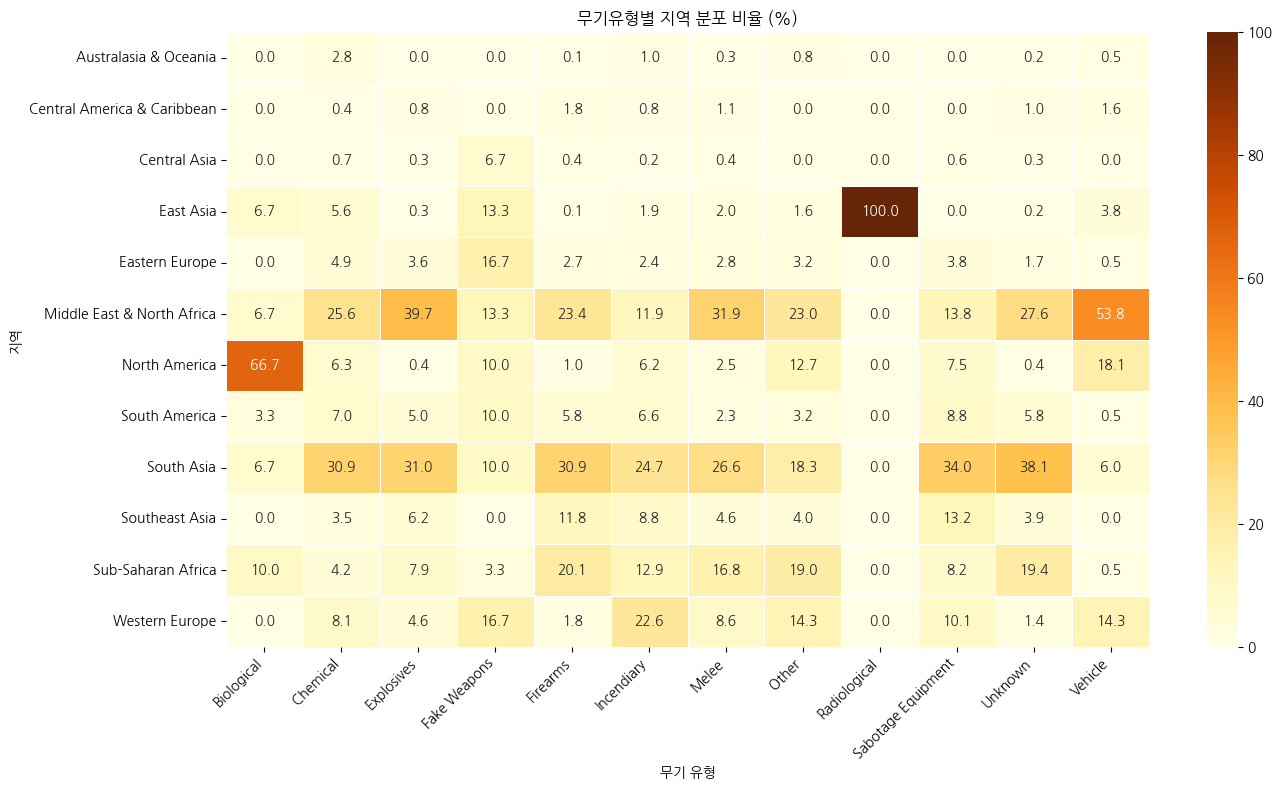

In [29]:
# 필요한 컬럼 추출 및 결측 제거
df_region_weapon = df[['weaptype1_txt', 'region_txt']]

# 무기유형 vs 지역 교차표 (건수)
weapon_region_crosstab = pd.crosstab(df_region_weapon['weaptype1_txt'], df_region_weapon['region_txt'])

# 비율(%)로 정규화
weapon_region_ratio = weapon_region_crosstab.div(weapon_region_crosstab.sum(axis=1), axis=0) * 100

# Heatmap 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(weapon_region_ratio.T, annot=True, fmt=".1f", cmap="YlOrBr", linewidths=0.5)
plt.title("무기유형별 지역 분포 비율 (%)")
plt.xlabel("무기 유형")
plt.ylabel("지역")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**각 지역에서 어떤 무기유형으로 주로 테러가 일어나는지**

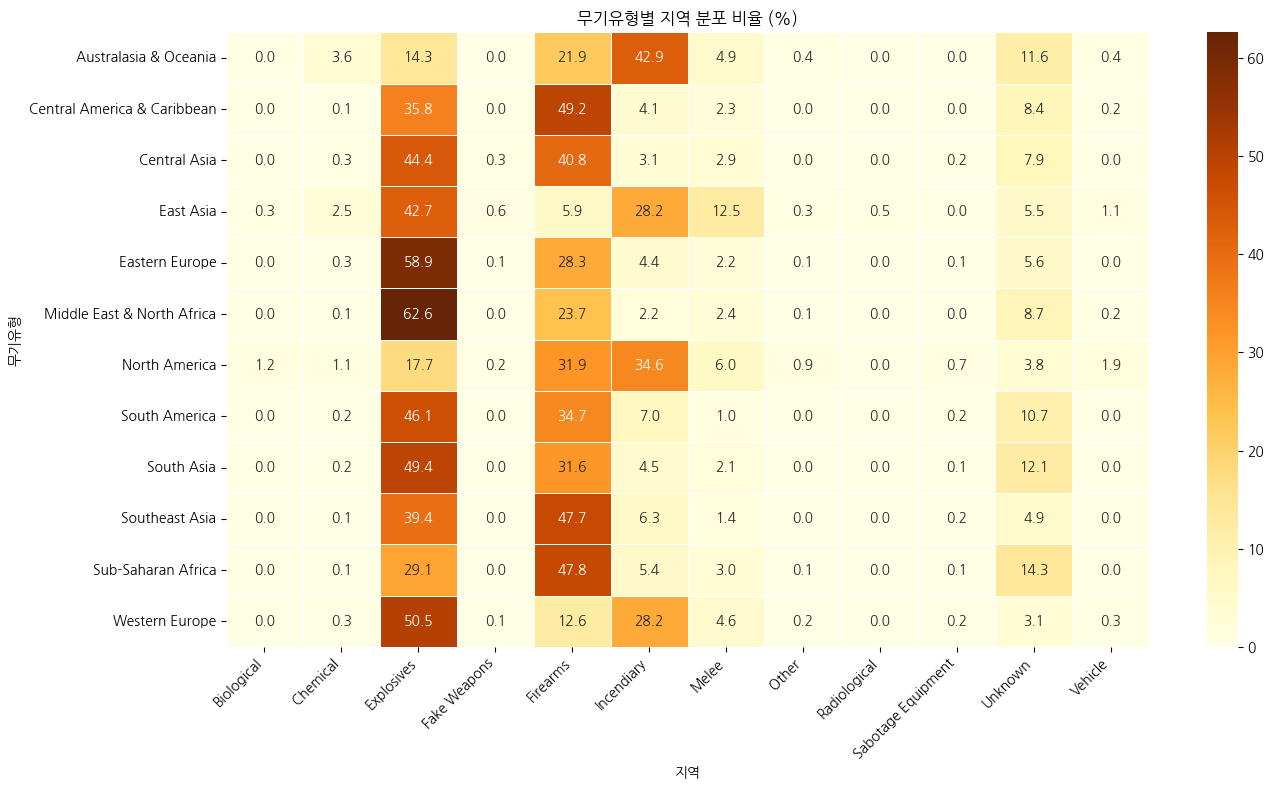

In [30]:
# 1. 교차표 생성 (행: region, 열: weapon type)
ct_region_weapon = pd.crosstab(df['region_txt'], df['weaptype1_txt'])

# 비율(%)로 정규화
weapon_region_ratio = ct_region_weapon.div(ct_region_weapon.sum(axis=1), axis=0) * 100

# Heatmap 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(weapon_region_ratio, annot=True, fmt=".1f", cmap="YlOrBr", linewidths=0.5)
plt.title("무기유형별 지역 분포 비율 (%)")
plt.xlabel("지역")
plt.ylabel("무기유형")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
# 카이제곱 검정
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct_region_weapon)

print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")
print(f"Degrees of Freedom: {dof}")

if p < 0.05:
    print("📌 유의미한 관계 있음: 지역에 따라 사용된 무기 유형이 다름")
else:
    print("📌 유의미한 관계 없음: 지역과 무기 유형 간 관련 없음")

Chi2 Statistic: 27799.34
p-value: 0.00000
Degrees of Freedom: 121
📌 유의미한 관계 있음: 지역에 따라 사용된 무기 유형이 다름


**무기유형과 타겟 조합의 지역별 변화 양상**

In [32]:
df['weapon_target_combo'] = df['weaptype1_txt'] + ' → ' + df['targtype1_txt']

# 전체 조합별 count
combo_top = df['weapon_target_combo'].value_counts().head(20).index.tolist()

# Top 20 조합만 필터링
df_top_combo = df[df['weapon_target_combo'].isin(combo_top)]

# 교차표 (지역 × 조합)
combo_ct_top = pd.crosstab(df_top_combo['region_txt'], df_top_combo['weapon_target_combo'])

# 비율 정규화
combo_ratio_top = combo_ct_top.div(combo_ct_top.sum(axis=1), axis=0)


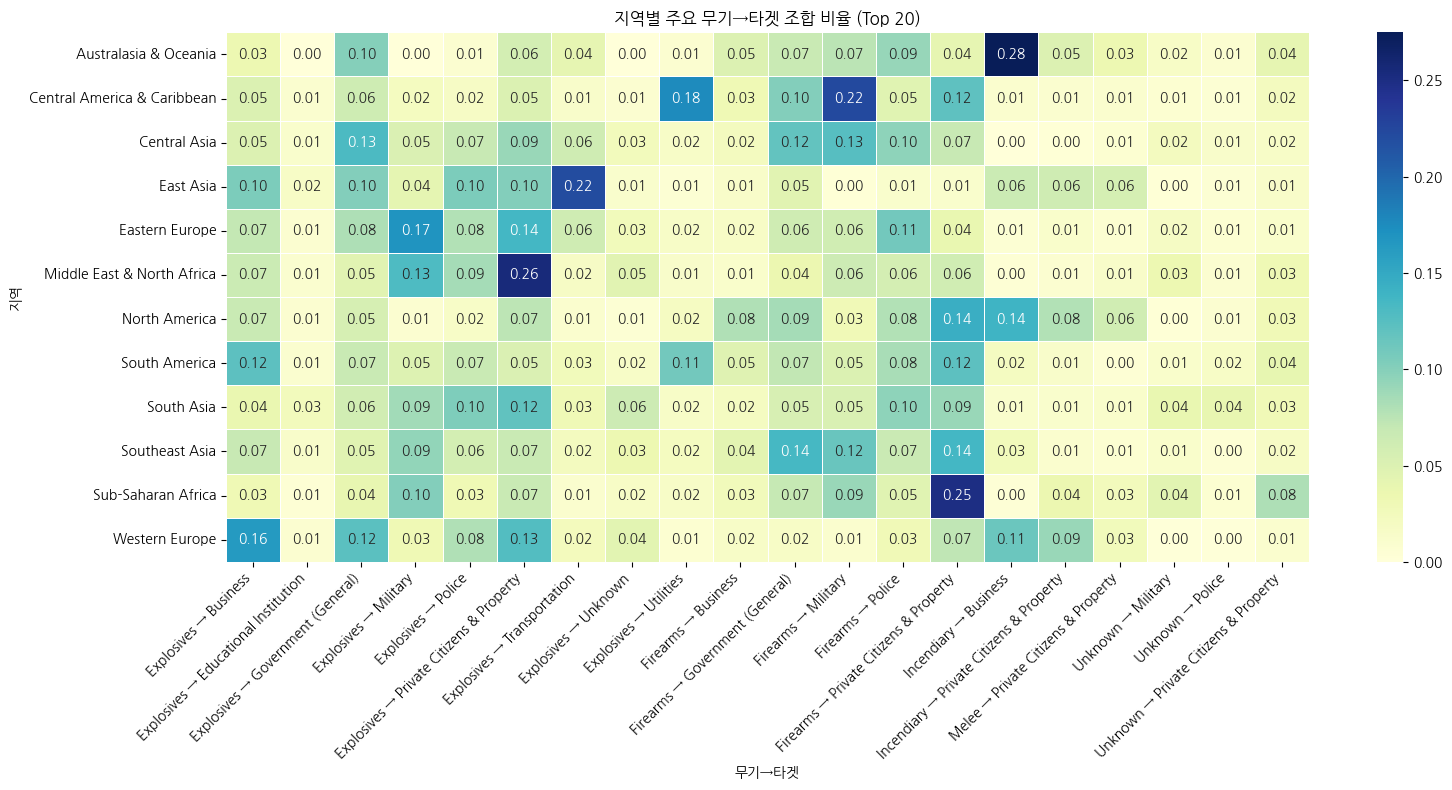

In [33]:
plt.figure(figsize=(16, 8))
sns.heatmap(combo_ratio_top, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title("지역별 주요 무기→타겟 조합 비율 (Top 20)")
plt.xlabel("무기→타겟")
plt.ylabel("지역")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 결론- 가설3
지역에 따라 사용된 무기유형이 달라짐을 통계적으로 확인!!

#### 결론: 1-3 -- 이전과 달라짐!!!
- 중동지역에서는 정말 다양한 유형의 무기가 골고루 일어나고, 폭발물이 1위라고 생각했었던 것과 다르게 vehicle이 1위였음.
- south asia에서는 sabotage가 1위엿음

이거 이전 결론인데 혜은언니랑 값이 같게 나왔던 것 같은데, 지금해보까 다르네요?!

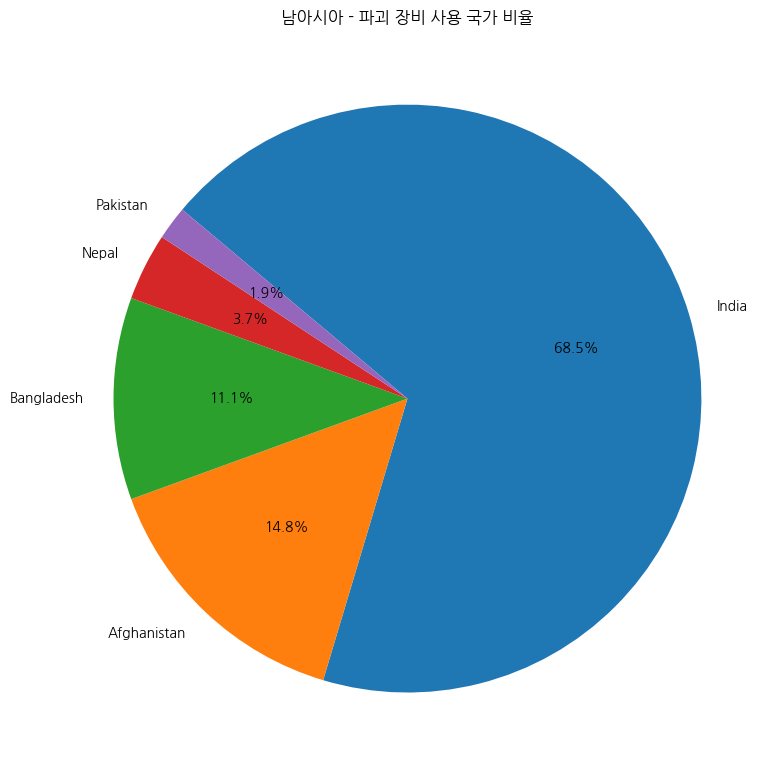

In [34]:
# 조건 필터링
filtered = df[(df['weaptype1_txt'] == 'Sabotage Equipment') & (df['region_txt'] == 'South Asia')]

# 국가별 비율 계산
country_counts = filtered['country_txt'].value_counts()
country_ratio = (country_counts / country_counts.sum()) * 100

# 파이차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(country_ratio, labels=country_ratio.index, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title("남아시아 - 파괴 장비 사용 국가 비율")
plt.tight_layout()
plt.show()

In [35]:
filtered

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,latitude,longitude,city,success,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound,natlty1_txt,gname,decade,weapon_target_combo
692,199003190007,1990,3,19,Bangladesh,South Asia,Chittagong,22.633539,91.797394,Nazirhat,1,Facility/Infrastructure Attack,Transportation,Sabotage Equipment,0.0,0,Bangladesh,Unknown,1990,Sabotage Equipment → Transportation
29298,200005080002,2000,5,8,India,South Asia,Maharashtra,19.075984,72.877656,Mumbai,1,Facility/Infrastructure Attack,Religious Figures/Institutions,Sabotage Equipment,0.0,2,India,Vishwa Hindu Parishad (VHP),2000,Sabotage Equipment → Religious Figures/Institu...
34693,200307150003,2003,7,15,India,South Asia,Bihar,25.975014,85.860139,Rambhadrapur,1,Facility/Infrastructure Attack,Transportation,Sabotage Equipment,0.0,0,India,Maoist Communist Center (MCC),2000,Sabotage Equipment → Transportation
34694,200307150004,2003,7,15,India,South Asia,Bihar,26.740556,85.273056,Bairagnia,1,Facility/Infrastructure Attack,Transportation,Sabotage Equipment,0.0,0,India,Maoist Communist Center (MCC),2000,Sabotage Equipment → Transportation
44883,200803130008,2008,3,13,Afghanistan,South Asia,Laghman,34.824077,70.360692,Alingar district,1,Facility/Infrastructure Attack,Telecommunication,Sabotage Equipment,0.0,0,Afghanistan,Taliban,2000,Sabotage Equipment → Telecommunication
46262,200806090014,2008,6,9,India,South Asia,Chhattisgarh,18.9,81.35,Dantewada district,1,Facility/Infrastructure Attack,Transportation,Sabotage Equipment,0.0,0,India,Communist Party of India - Maoist (CPI-Maoist),2000,Sabotage Equipment → Transportation
50809,200905110036,2009,5,11,India,South Asia,Assam,25.391134,93.119896,Mupa,1,Facility/Infrastructure Attack,Transportation,Sabotage Equipment,0.0,0,India,Unknown,2000,Sabotage Equipment → Transportation
51027,200905280014,2009,5,28,India,South Asia,Assam,25.496972,93.110706,Langting,1,Facility/Infrastructure Attack,Transportation,Sabotage Equipment,0.0,0,India,Unknown,2000,Sabotage Equipment → Transportation
51056,200905290023,2009,5,29,India,South Asia,Assam,26.275268,92.953375,Phuloni,1,Facility/Infrastructure Attack,Transportation,Sabotage Equipment,0.0,0,India,Unknown,2000,Sabotage Equipment → Transportation
51859,200907230013,2009,7,23,India,South Asia,West Bengal,22.609739,87.253142,Pirrakhuli,1,Facility/Infrastructure Attack,Violent Political Party,Sabotage Equipment,0.0,0,India,Communist Party of India - Maoist (CPI-Maoist),2000,Sabotage Equipment → Violent Political Party


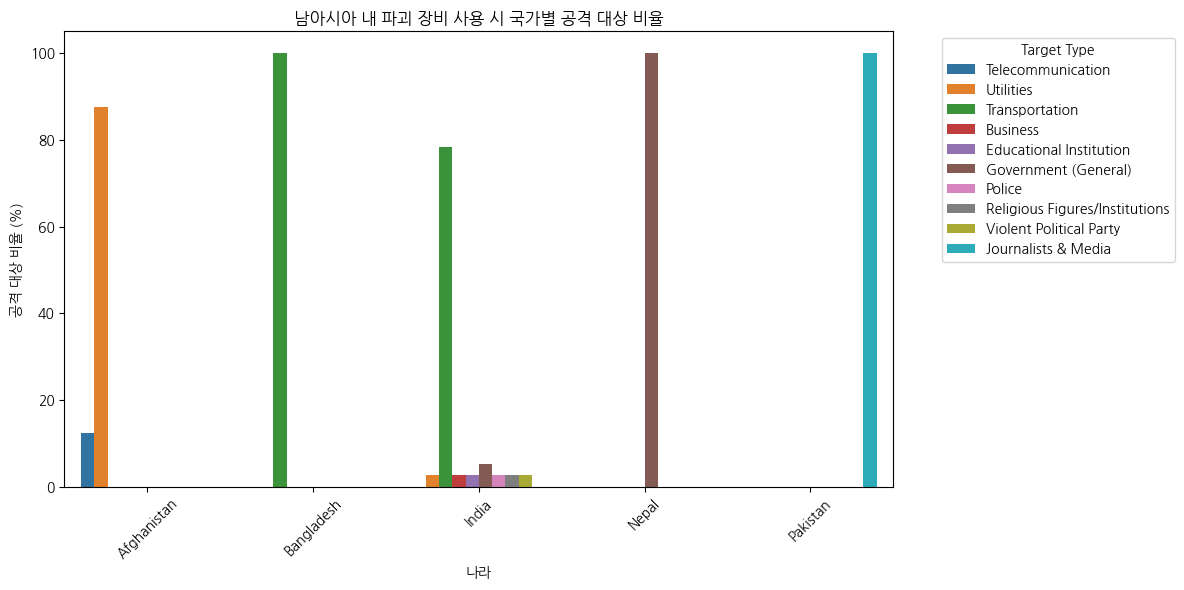

In [36]:
# 조건 필터링
filtered = df[
    (df['weaptype1_txt'] == 'Sabotage Equipment') &
    (df['region_txt'] == 'South Asia')
]

# 국가별 공격 대상 비율 계산
target_counts = filtered.groupby(['country_txt', 'targtype1_txt']).size().reset_index(name='count')
target_counts['total'] = target_counts.groupby('country_txt')['count'].transform('sum')
target_counts['ratio'] = (target_counts['count'] / target_counts['total']) * 100

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=target_counts, x='country_txt', y='ratio', hue='targtype1_txt')
plt.title("남아시아 내 파괴 장비 사용 시 국가별 공격 대상 비율")
plt.ylabel("공격 대상 비율 (%)")
plt.xlabel("나라")
plt.xticks(rotation=45)
plt.legend(title='Target Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 가설 4. 테러를 일으키고자 하는 월/요일에 따라서 무기유형을 다르게 선택할 것이다.

- 공격의 효과를 극대화하기 위해서는 요일과 월을 고려해서 무기 유형을 선택할 것 같다!
    - 예: 사람들이 출근하는 요일같은 경우에는 대량 살상 목적 >> 폭발물
     혹은 통신기능 / 시설 마비를 목적으로 방화


### 월별

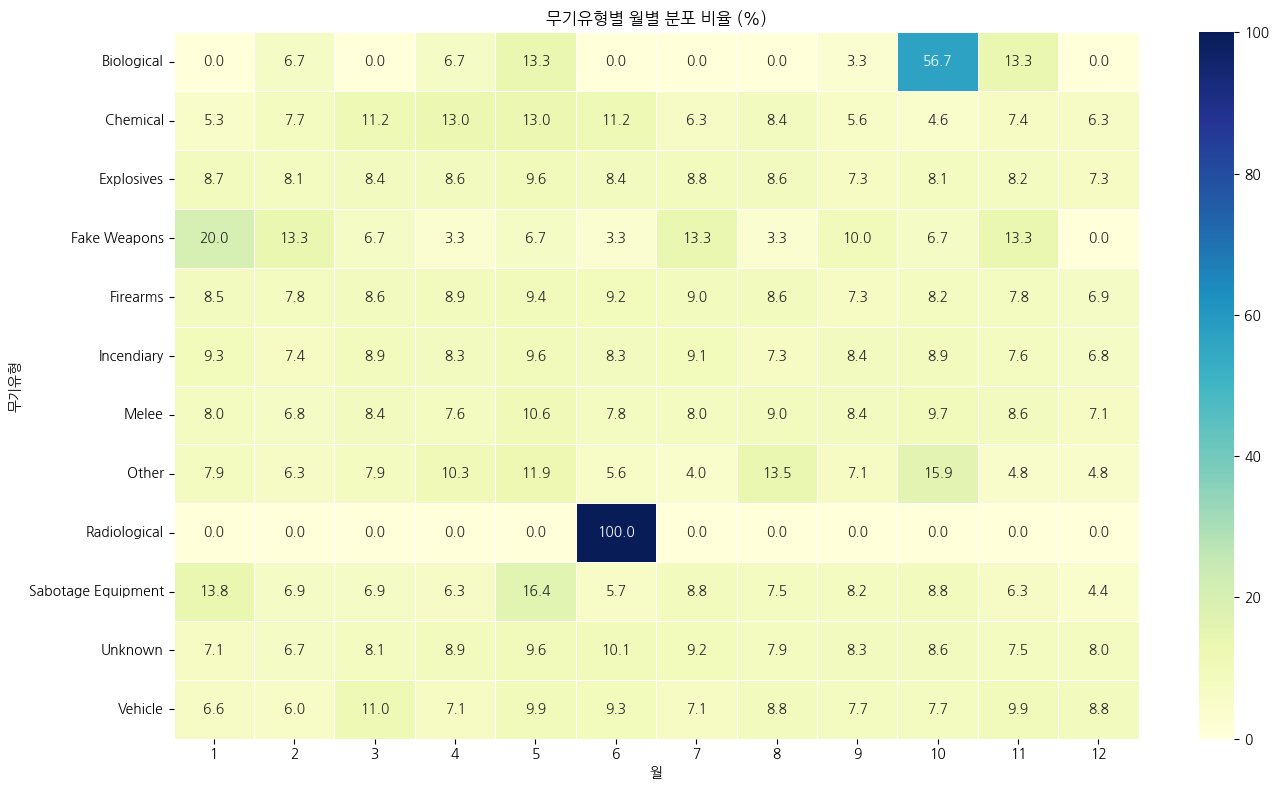

In [37]:
# 유효한 데이터 필터링
df_month = df[(df['imonth'] > 0) & (~df['weaptype1_txt'].isnull())]

# 교차표: 무기유형 vs 월
month_crosstab = pd.crosstab(df_month['weaptype1_txt'], df_month['imonth'])
month_ratio = month_crosstab.div(month_crosstab.sum(axis=1), axis=0) * 100

# 히트맵 시각화
plt.figure(figsize=(14, 8))

sns.heatmap(month_ratio, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("무기유형별 월별 분포 비율 (%)")
plt.xlabel("월")
plt.ylabel("무기유형")
plt.tight_layout()
plt.show()

더 살펴볼것

-  해당 월에 정치일정/종교행사/사람들이 많이 모이는 행사같은 것들이 많이 예정이되어있는지

- 날씨나 환경적 요일에 따라 전략이 달라지는지?

In [38]:
from scipy.stats import chi2_contingency
import pandas as pd

# 교차표 생성
contingency = pd.crosstab(df['weaptype1_txt'], df['imonth'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency)

# 결과 출력
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")
print(f"Degrees of Freedom: {dof}")


Chi2 Statistic: 534.69
p-value: 0.00000
Degrees of Freedom: 121


### 요일별
- 보통 주말에 교회나 성당을 가니까 주말에 테러가 많이 일어나지 않을까?
- 근데 또 폭발물 같은 경우네는 무작위 다수를 노리니까 아무때나 일어날 것 같기도?

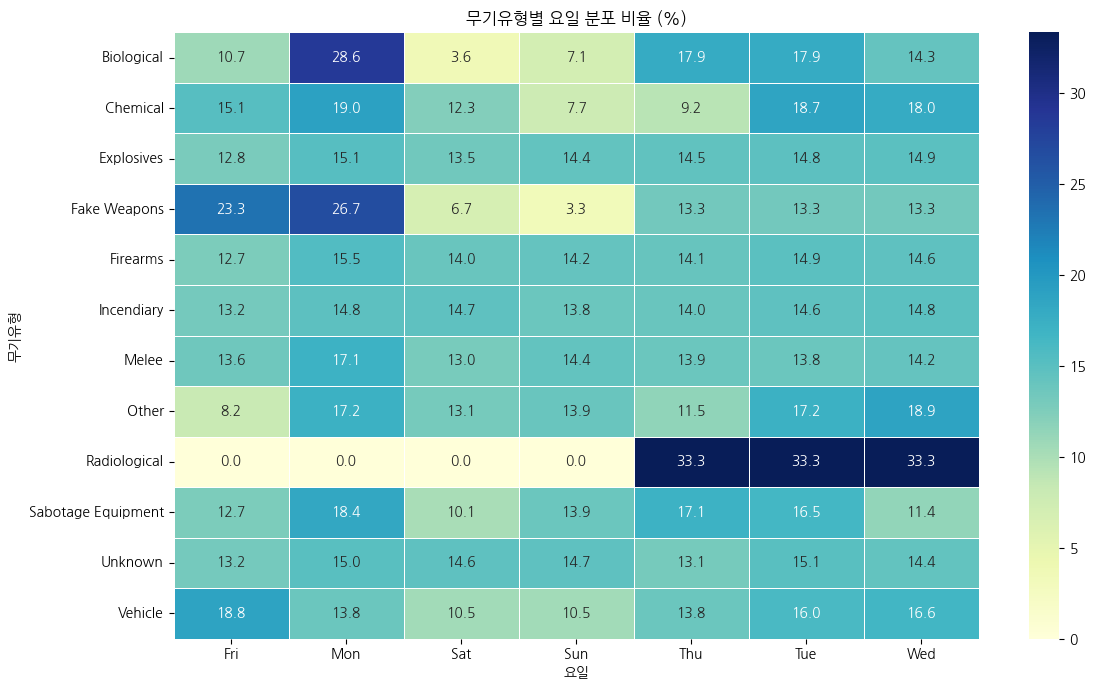

In [39]:
# 날짜 조합용 임시 컬럼명으로 바꾸기
df['year'] = df['iyear']
df['month'] = df['imonth']
df['day'] = df['iday']

# 결측 제거
df = df[(df['year'] > 0) & (df['month'] > 0) & (df['day'] > 0)]

# 날짜 변환
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

# 요일 추출 (0=월 ~ 6=일)
df['weekday'] = df['date'].dt.dayofweek

# 요일 이름 매핑
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['weekday'] = df['weekday'].map(weekday_map)

# 교차표 및 비율 계산
df_weekday = df[~df['weekday'].isnull() & ~df['weaptype1_txt'].isnull()]
weekday_crosstab = pd.crosstab(df_weekday['weaptype1_txt'], df_weekday['weekday'])
weekday_ratio = weekday_crosstab.div(weekday_crosstab.sum(axis=1), axis=0) * 100

# 히트맵 시각화
plt.figure(figsize=(12, 7))
sns.heatmap(weekday_ratio, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("무기유형별 요일 분포 비율 (%)")
plt.xlabel("요일")
plt.ylabel("무기유형")
plt.tight_layout()
plt.show()

In [40]:
from scipy.stats import chi2_contingency
import pandas as pd

# 교차표 생성
contingency = pd.crosstab(df['weaptype1_txt'], df['weekday'])
# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency)

# 결과 출력
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")
print(f"Degrees of Freedom: {dof}")


Chi2 Statistic: 133.41
p-value: 0.00000
Degrees of Freedom: 66


++++ 요일/월/계절별로 공격받는 대상이 달라질까?

# 국가별 분석 - 영국

In [41]:
import pandas as pd

# 국가별 전체 테러 발생 건수 카운트
country_counts = df['country_txt'].value_counts()

# 1000건 이상의 테러가 발생한 국가 리스트 생성
countries_over_1000 = country_counts[country_counts >= 1000].index.tolist()

# 해당 국가 데이터만 필터링
df_filtered = df[df['country_txt'].isin(countries_over_1000)]

# 국가별로 테러 성공률 계산
success_rate = df_filtered.groupby('country_txt')['success'].mean() * 100

# 성공률 내림차순 정렬
# success_rate_sorted = success_rate.sort_values(ascending=False).reset_index()

# 결과 출력
# print(success_rate_sorted.rename(columns={'country_txt': '국가', 'success': '테러 성공률(%)'}))

success_rate_sorted = success_rate.sort_values(ascending=True).reset_index()
print(success_rate_sorted.rename(columns={'country_txt': '국가', 'success': '테러 성공률(%)'}))

                                  국가  테러 성공률(%)
0                     United Kingdom  70.450949
1                              Nepal  75.751503
2                             Israel  75.785024
3           West Bank and Gaza Strip  76.501534
4                              Yemen  81.910870
5                              Egypt  82.184137
6                      United States  82.200358
7                             Russia  82.506763
8                              India  83.283204
9                        Philippines  83.867860
10                           Lebanon  85.188431
11                          Pakistan  87.139423
12                       Afghanistan  87.152185
13                             Libya  87.937579
14                           Ukraine  89.120370
15                              Iraq  89.760049
16                           Somalia  90.141376
17                            France  90.605590
18                            Turkey  91.022790
19                        Bangladesh  91

___

# 머신러닝 전 국가별 성공 에측 성능도 확인 - 영국

선택한 이유
- 테러 성공률이 가장 낮은 나라(테러 1000건 이상인 국가 중)

In [42]:
# # 나라 이름 필터링
# uk_df = df[df['country_txt'] == 'United Kingdom']

# # success 평균 (성공률)
# uk_success_rate = uk_df['success'].mean()

# print(f"영국 테러 성공률: {uk_success_rate:.2%}")

In [43]:
uk_df=pd.read_excel("/content/drive/MyDrive/LIKELION_데이터분석/finalproject/uk_df(한글).xlsx")
uk_df.head()

,Unnamed: 0,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,latitude,longitude,...,natlty1_txt,gname,decade,weapon_target_combo,year,month,day,date,weekday,month_name
0,11,199001020004,1990,1,2,영국,서유럽,북아일랜드,54.607712,-5.95621,...,북아일랜드,Irish Republican Army (IRA),1990,폭발물 → 사업체,1990,1,2,1990-01-02,화요일,1월
1,21,199001030005,1990,1,3,영국,서유럽,북아일랜드,54.755402,-6.606029,...,북아일랜드,Irish Republican Army (IRA),1990,폭발물 → 군대,1990,1,3,1990-01-03,수요일,1월
2,46,199001060010,1990,1,6,영국,서유럽,북아일랜드,54.463367,-6.328597,...,북아일랜드,Protestant extremists,1990,화기 → 민간인 및 재산,1990,1,6,1990-01-06,토요일,1월
3,79,199001090006,1990,1,9,영국,서유럽,북아일랜드,54.706718,-7.592867,...,북아일랜드,Irish Republican Army (IRA),1990,화기 → 군대,1990,1,9,1990-01-09,화요일,1월
4,80,199001090007,1990,1,9,영국,서유럽,북아일랜드,54.706718,-7.592867,...,북아일랜드,Irish Republican Army (IRA),1990,알 수 없음 → 경찰,1990,1,9,1990-01-09,화요일,1월


## 가설검증
- EDA단계, 즉 전국적인 데이터셋에서 유의미했던 변수들이 영국데이터에서도 유의미한 변수들인지 확인하기 위함

        테러의 성공률은 요일과 월에 따라 달라질것이다.
        무기유형별에 따라 달라질 것이다.
        공격 유형벌로 달라질것이다
        공격 타겟별로 달라질 것이다
        provstate에 따라 달라질것이다.

### **월에 따라 성공률이 달라질 것이다**

In [44]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2528 non-null   int64         
 1   eventid              2528 non-null   int64         
 2   iyear                2528 non-null   int64         
 3   imonth               2528 non-null   int64         
 4   iday                 2528 non-null   int64         
 5   country_txt          2528 non-null   object        
 6   region_txt           2528 non-null   object        
 7   provstate            2528 non-null   object        
 8   latitude             2528 non-null   object        
 9   longitude            2528 non-null   object        
 10  city                 2528 non-null   object        
 11  success              2528 non-null   int64         
 12  attacktype1_txt      2528 non-null   object        
 13  targtype1_txt        2528 non-nul

<ipython-input-45-e15095a7fd7c>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=uk_df, x='month_name', y='success', estimator='mean', order=month_order, ci=None)


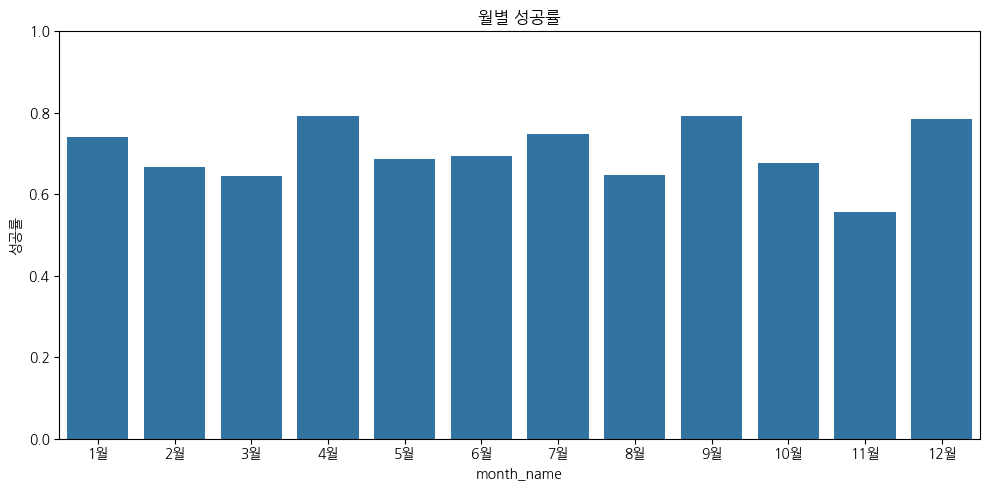

In [45]:
month_order = ['1월', '2월', '3월', '4월', '5월', '6월',
               '7월', '8월', '9월', '10월', '11월', '12월']

uk_df['month_name'] = uk_df['imonth'].map({
    1: '1월', 2: '2월', 3: '3월', 4: '4월',
    5: '5월', 6: '6월', 7: '7월', 8: '8월',
    9: '9월', 10: '10월', 11: '11월', 12: '12월'
})

plt.figure(figsize=(10, 5))
sns.barplot(data=uk_df, x='month_name', y='success', estimator='mean', order=month_order, ci=None)
plt.title('월별 성공률')
plt.ylabel('성공률')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [46]:
import scipy.stats as stats
import pandas as pd

# 교차표 생성
table = pd.crosstab(uk_df['month'], uk_df['success'])

# 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 55.13, p-value: 0.0000


### **요일에 따라 성공률이 달라질 것이다**

In [47]:
import scipy.stats as stats
import pandas as pd

# 교차표 생성
table = pd.crosstab(uk_df['weekday'], uk_df['success'])

# 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 19.39, p-value: 0.0035


In [48]:
table

success,0,1
weekday,,
금요일,126,261
목요일,142,265
수요일,112,268
월요일,111,243
일요일,81,271
토요일,77,241
화요일,98,232


['화요일' '수요일' '토요일' '목요일' '월요일' '일요일' '금요일']
weekday
목요일    407
금요일    387
수요일    380
월요일    354
일요일    352
화요일    330
토요일    318
Name: count, dtype: int64


<ipython-input-49-cd0bc73cb532>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_rates.index, y=weekday_rates.values, palette='crest')


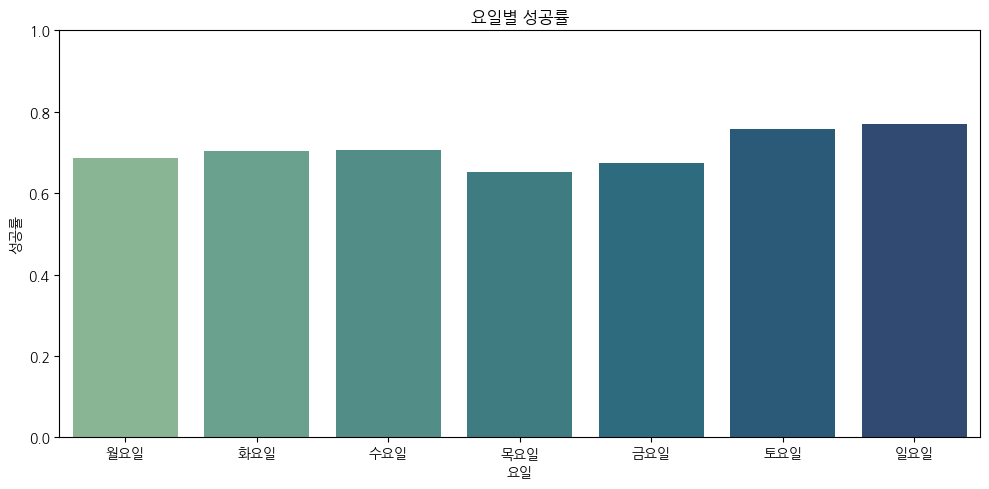

In [49]:
# 📌 1. 요일 값 확인
print(uk_df['weekday'].unique())
print(uk_df['weekday'].value_counts(dropna=False))

# 📌 2. 요일 범주 정렬 + 내림차순 그래프
weekday_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

weekday_rates = uk_df.groupby('weekday')['success'].mean().reindex(weekday_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_rates.index, y=weekday_rates.values, palette='crest')
plt.title('요일별 성공률')
plt.ylim(0, 1)
plt.xlabel('요일')
plt.ylabel('성공률')
plt.tight_layout()
plt.show()


### **무기유형에 따라 성공률이 달라질 것이다**

<ipython-input-50-4e79da2d4029>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_rates.values, y=weapon_rates.index, palette='viridis')


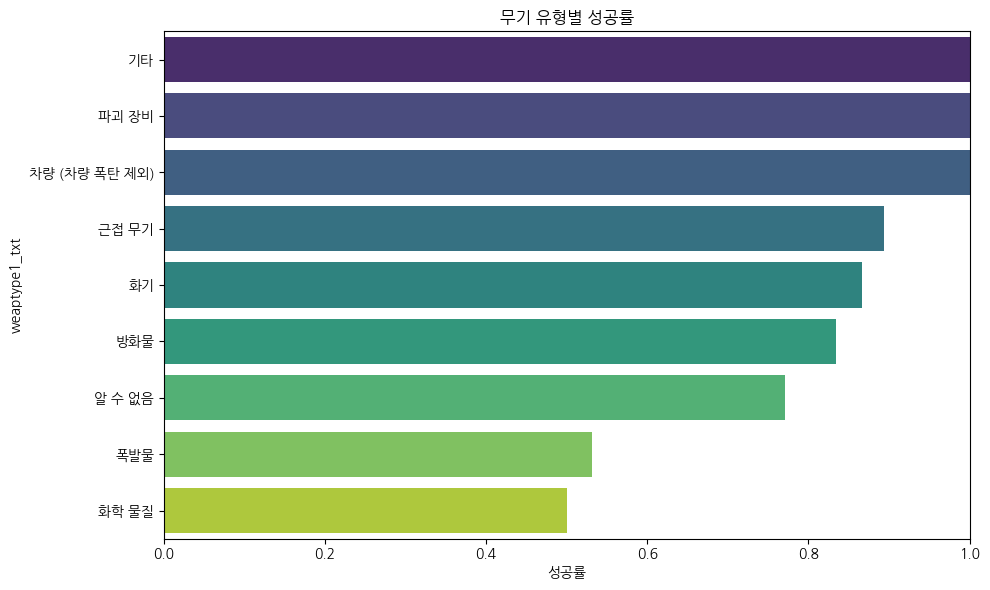

In [50]:
weapon_rates = uk_df.groupby('weaptype1_txt')['success'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_rates.values, y=weapon_rates.index, palette='viridis')
plt.title('무기 유형별 성공률')
plt.xlabel('성공률')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [51]:
import scipy.stats as stats

# 교차표 생성
table = pd.crosstab(uk_df['weaptype1_txt'], uk_df['success'])

# 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 311.69, p-value: 0.0000


### **공격유형에 따라 성공률이 달라질 것이다**

<ipython-input-52-e077df622582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_rates.values, y=weapon_rates.index, palette='viridis')


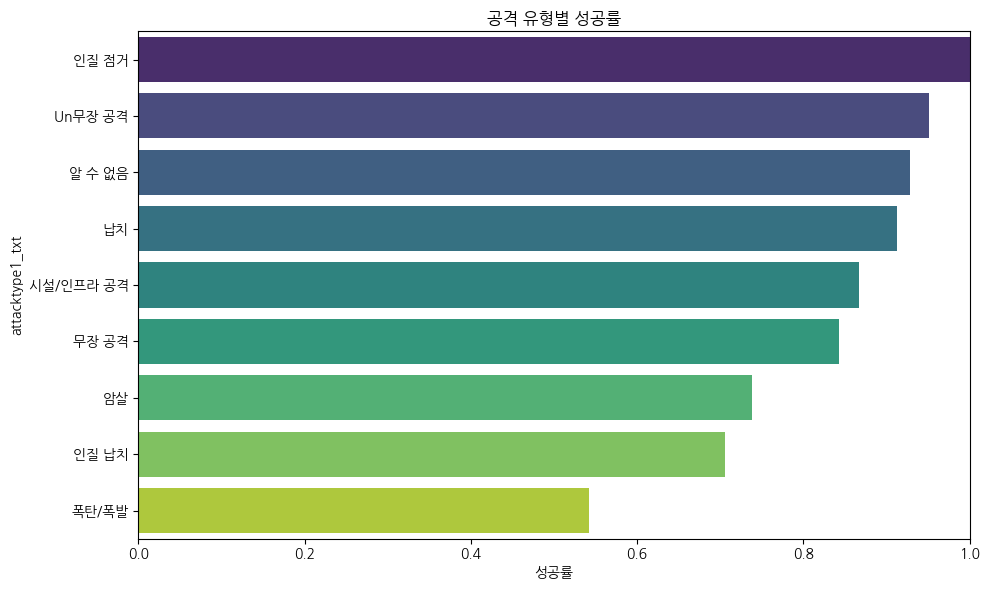

In [52]:
weapon_rates = uk_df.groupby('attacktype1_txt')['success'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_rates.values, y=weapon_rates.index, palette='viridis')
plt.title('공격 유형별 성공률')
plt.xlabel('성공률')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [53]:
# 교차표 생성
table = pd.crosstab(uk_df['attacktype1_txt'], uk_df['success'])

# 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 275.07, p-value: 0.0000


### **타겟대상에 따라 성공률이 달라질 것이다**

<ipython-input-54-c1bb76586234>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_rates.values, y=target_rates.index, palette='cubehelix')


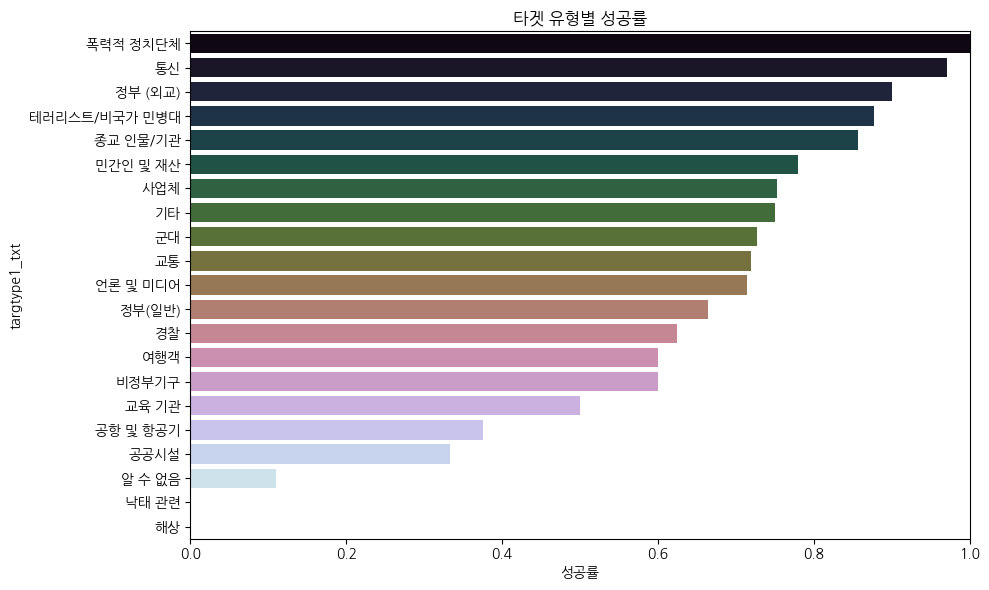

In [54]:
target_rates = uk_df.groupby('targtype1_txt')['success'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_rates.values, y=target_rates.index, palette='cubehelix')
plt.title('타겟 유형별 성공률')
plt.xlabel('성공률')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [55]:
# 교차표 생성
table = pd.crosstab(uk_df['targtype1_txt'], uk_df['success'])

# 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 329.56, p-value: 0.0000


### **지역에 따라 성공률이 달라질 것이다**

<ipython-input-56-6967b3c635fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prov_rates.values, y=prov_rates.index, palette='coolwarm')


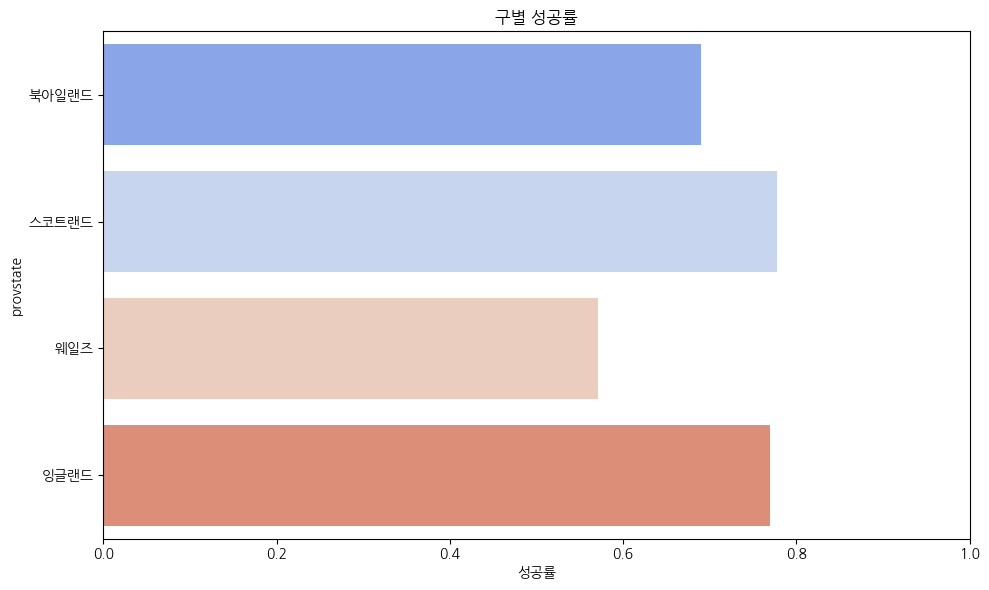

In [56]:
prov_rates = uk_df.groupby('provstate')['success'].mean()
# top_provs = prov_rates[uk_df['provstate'].value_counts() >= 30].sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=prov_rates.values, y=prov_rates.index, palette='coolwarm')
plt.title('구별 성공률')
plt.xlabel('성공률')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [57]:
# 교차표 생성
table = pd.crosstab(uk_df['provstate'], uk_df['success'])

# 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 12.72, p-value: 0.0053


## 모델링-변수 선택

In [58]:
success_counts = uk_df['success'].value_counts()
# 비율 계산
success_ratio = success_counts[1] / success_counts[0]
success_counts, round(success_ratio, 2)

#results: 2.38:1 비율은 불균형으로 보지 않음

(success
 1    1781
 0     747
 Name: count, dtype: int64,
 np.float64(2.38))

In [59]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2528 non-null   int64         
 1   eventid              2528 non-null   int64         
 2   iyear                2528 non-null   int64         
 3   imonth               2528 non-null   int64         
 4   iday                 2528 non-null   int64         
 5   country_txt          2528 non-null   object        
 6   region_txt           2528 non-null   object        
 7   provstate            2528 non-null   object        
 8   latitude             2528 non-null   object        
 9   longitude            2528 non-null   object        
 10  city                 2528 non-null   object        
 11  success              2528 non-null   int64         
 12  attacktype1_txt      2528 non-null   object        
 13  targtype1_txt        2528 non-nul

In [60]:
#변수선택
features = [
    'weekday',           # 요일
    'month_name',        # 월 이름 (또는 imonth)
    'attacktype1_txt',   # 공격 유형
    'targtype1_txt',     # 타겟 유형
    'weaptype1_txt',     # 무기 유형
    'provstate'          # 지역
]

In [61]:
uk_df[['provstate', 'success']].groupby(['provstate'], as_index=False).mean().sort_values(by='success', ascending=False)

,provstate,success
1,스코트랜드,0.777778
3,잉글랜드,0.770241
0,북아일랜드,0.689638
2,웨일즈,0.571429


In [62]:
# 예: 필요한 컬럼만 남긴 새 DataFrame 만들기
keep_cols = [
    'weekday', 'month', 'attacktype1_txt',
    'targtype1_txt', 'weaptype1_txt',
    'provstate', 'success'
]

uk_model = uk_df.copy()
uk_model = uk_df[keep_cols]


In [63]:
uk_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   weekday          2528 non-null   object
 1   month            2528 non-null   int64 
 2   attacktype1_txt  2528 non-null   object
 3   targtype1_txt    2528 non-null   object
 4   weaptype1_txt    2528 non-null   object
 5   provstate        2528 non-null   object
 6   success          2528 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 138.4+ KB


# 모델링

**지도학습 분류 모델**
- 스케일링이 필요없는 모델: 트리계열모델
- 스키일링이 필요한 모델: 거리기반의 분류모델

**성능 평가 지표**
- 긍정 클래스 놓치면 안됨 -> recall
- 잘못된 긍정 예측 위험율이 낮아야함(자원/예산 낭비 방지 목적) -> precision
- 둘의 조화 -> F1 score

## 정규성확인

In [65]:
encoded_data_onehot = pd.get_dummies(uk_model)

from sklearn.preprocessing import LabelEncoder

# 복사본 만들기
encoded_data_label = uk_model.copy()

# 문자열(범주형) 컬럼들만 라벨 인코딩
label_encoders = {}
for col in encoded_data_label.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded_data_label[col] = le.fit_transform(encoded_data_label[col].astype(str))
    label_encoders[col] = le  # 나중에 inverse_transform할 때 쓰기 위함


In [66]:
# 스케일링이 필요한 모델들이 있기 때문에, 어떤 스케일링을 사용해야할지 확인해봐야함
from scipy.stats import shapiro
numeric_cols = encoded_data_label.select_dtypes(include='number').columns

for col in numeric_cols:
    stat, p = shapiro(encoded_data_label[col])
    print(f"{col}: p-value = {p:.4f} → {'정규성 있음' if p > 0.05 else '정규성 없음'}")


weekday: p-value = 0.0000 → 정규성 없음
month: p-value = 0.0000 → 정규성 없음
attacktype1_txt: p-value = 0.0000 → 정규성 없음
targtype1_txt: p-value = 0.0000 → 정규성 없음
weaptype1_txt: p-value = 0.0000 → 정규성 없음
provstate: p-value = 0.0000 → 정규성 없음
success: p-value = 0.0000 → 정규성 없음


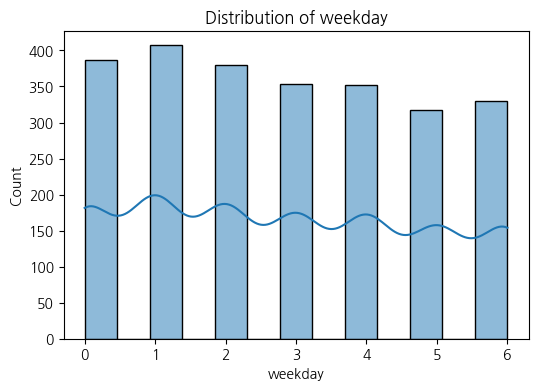

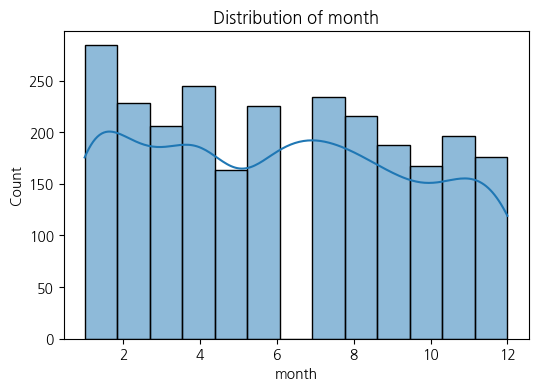

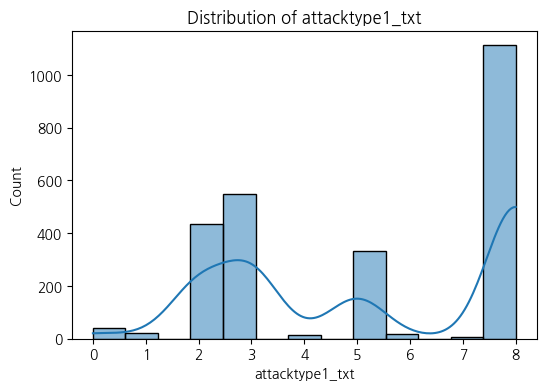

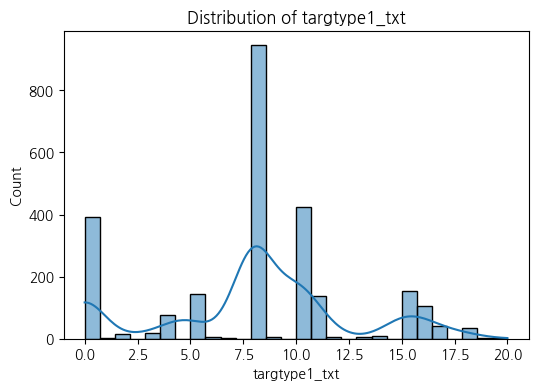

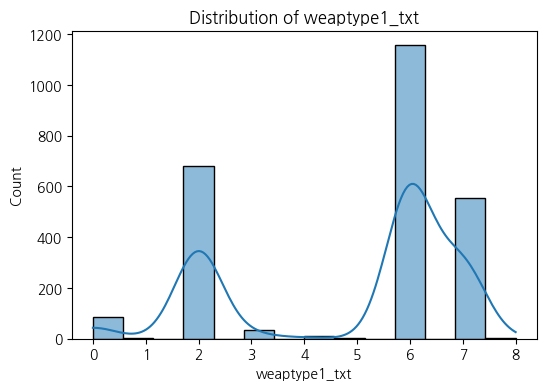

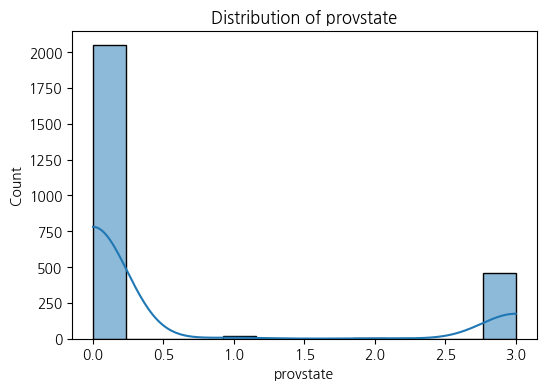

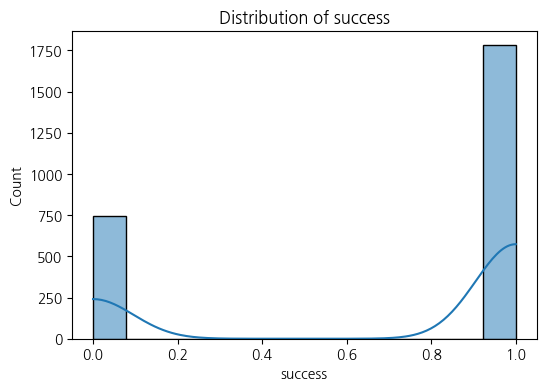

In [67]:
# 수치형 변수의 분포 그래프
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(encoded_data_label[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [68]:
# 원핫인코딩
from scipy.stats import shapiro
numeric_cols = encoded_data_onehot.select_dtypes(include='number').columns

for col in numeric_cols:
    stat, p = shapiro(encoded_data_onehot[col])
    print(f"{col}: p-value = {p:.4f} → {'정규성 있음' if p > 0.05 else '정규성 없음'}")


month: p-value = 0.0000 → 정규성 없음
success: p-value = 0.0000 → 정규성 없음


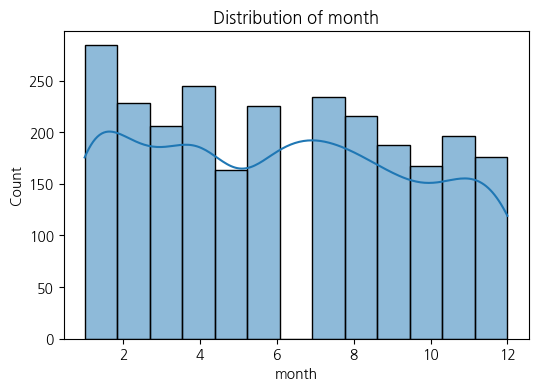

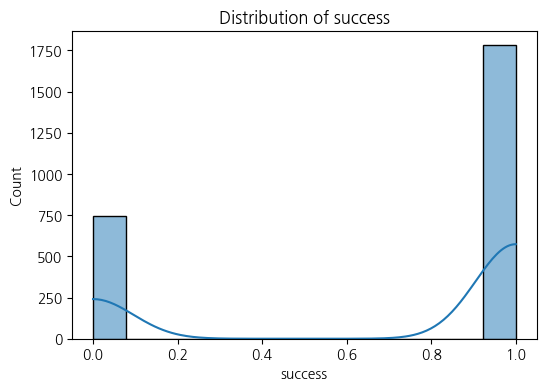

In [69]:
# 수치형 변수의 분포 그래프
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(encoded_data_onehot[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

사실 범주형변수들을 숫자로 인코딩한것들이라 정규성이 있을수가 없음 -> minmax

## 모델링 - 원핫인코딩&라벨인코딩

In [70]:
encoded_data_onehot.columns

Index(['month', 'success', 'weekday_금요일', 'weekday_목요일', 'weekday_수요일',
       'weekday_월요일', 'weekday_일요일', 'weekday_토요일', 'weekday_화요일',
       'attacktype1_txt_Un무장 공격', 'attacktype1_txt_납치',
       'attacktype1_txt_무장 공격', 'attacktype1_txt_시설/인프라 공격',
       'attacktype1_txt_알 수 없음', 'attacktype1_txt_암살', 'attacktype1_txt_인질 납치',
       'attacktype1_txt_인질 점거', 'attacktype1_txt_폭탄/폭발', 'targtype1_txt_경찰',
       'targtype1_txt_공공시설', 'targtype1_txt_공항 및 항공기', 'targtype1_txt_교육 기관',
       'targtype1_txt_교통', 'targtype1_txt_군대', 'targtype1_txt_기타',
       'targtype1_txt_낙태 관련', 'targtype1_txt_민간인 및 재산', 'targtype1_txt_비정부기구',
       'targtype1_txt_사업체', 'targtype1_txt_알 수 없음', 'targtype1_txt_언론 및 미디어',
       'targtype1_txt_여행객', 'targtype1_txt_정부 (외교)', 'targtype1_txt_정부(일반)',
       'targtype1_txt_종교 인물/기관', 'targtype1_txt_테러리스트/비국가 민병대',
       'targtype1_txt_통신', 'targtype1_txt_폭력적 정치단체', 'targtype1_txt_해상',
       'weaptype1_txt_근접 무기', 'weaptype1_txt_기타', 'weaptype1_txt_방화물',


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

results_tree = []
features=['weekday', 'month', 'attacktype1_txt',
    'targtype1_txt', 'weaptype1_txt', 'provstate']

for encoding_name, data in [('Label Encoding', encoded_data_label), ('One-hot Encoding', encoded_data_onehot)]:

    if encoding_name == 'Label Encoding':
        X = data[features]
    else:
        X = data  # One-hot은 전체 사용

    y = uk_df['success']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results_tree.append({
            'Encoding': encoding_name,
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, zero_division=0)
        })

df_tree_results = pd.DataFrame(results_tree)


In [72]:
uk_model.columns

Index(['weekday', 'month', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt',
       'provstate', 'success'],
      dtype='object')

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

results_scaled = []
features=['weekday', 'month', 'attacktype1_txt',
    'targtype1_txt', 'weaptype1_txt', 'provstate']

for encoding_name, data in [('Label Encoding', encoded_data_label), ('One-hot Encoding', encoded_data_onehot)]:

    if encoding_name == 'Label Encoding':
        X = data[features]
    else:
        X = data  # One-hot은 전체 사용

    y = uk_df['success']

    # ✅ MinMax 스케일링
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'SVM': SVC(),
        'MLP (Neural Net)': MLPClassifier(max_iter=500)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results_scaled.append({
            'Encoding': encoding_name,
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, zero_division=0)
        })

df_not_tree_results = pd.DataFrame(results_scaled)


In [74]:
final_results = pd.concat([df_tree_results, df_not_tree_results]).sort_values(by='F1 Score', ascending=False)
print(final_results)


           Encoding                Model  Accuracy  Precision    Recall  \
3  One-hot Encoding        Random Forest  1.000000   1.000000  1.000000   
2  One-hot Encoding        Decision Tree  1.000000   1.000000  1.000000   
4  One-hot Encoding  Logistic Regression  1.000000   1.000000  1.000000   
6  One-hot Encoding                  SVM  1.000000   1.000000  1.000000   
7  One-hot Encoding     MLP (Neural Net)  0.998024   0.997175  1.000000   
5  One-hot Encoding  K-Nearest Neighbors  0.952569   0.943396  0.991501   
3    Label Encoding     MLP (Neural Net)  0.731225   0.744921  0.934844   
1    Label Encoding        Random Forest  0.747036   0.790698  0.866856   
2    Label Encoding                  SVM  0.719368   0.734967  0.934844   
1    Label Encoding  K-Nearest Neighbors  0.735178   0.780051  0.864023   
0    Label Encoding  Logistic Regression  0.701581   0.713983  0.954674   
0    Label Encoding        Decision Tree  0.695652   0.798799  0.753541   

   F1 Score  
3  1.00000



---



## 모델링 - provstate만 타겟인코딩

In [75]:
# 원본에서 시작
uk_model = uk_df[[
    'weekday', 'month_name', 'attacktype1_txt',
    'targtype1_txt', 'weaptype1_txt', 'provstate'
]].copy()

# target은 따로 저장
y = uk_df['success']

# 👉 provstate만 따로 저장
provstate_series = uk_model['provstate'].copy()

# ✅ 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

encoded_data_label = uk_model.drop(columns=['provstate']).copy()
label_encoders = {}
for col in encoded_data_label.columns:
    le = LabelEncoder()
    encoded_data_label[col] = le.fit_transform(encoded_data_label[col].astype(str))
    label_encoders[col] = le

# ✅ 원핫 인코딩
encoded_data_onehot = pd.get_dummies(uk_model.drop(columns=['provstate'])).astype(int)
#트리 기반
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 결과 저장용
results_tree = []

for encoding_name, data in [('Label Encoding', encoded_data_label), ('One-hot Encoding', encoded_data_onehot)]:

    # provstate 다시 붙이기
    data = data.copy()
    data['provstate'] = provstate_series.values

    # split
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

    # ✅ 타겟 인코딩
    prov_mean = pd.concat([X_train['provstate'], y_train], axis=1).groupby('provstate')['success'].mean()
    X_train['provstate_enc'] = X_train['provstate'].map(prov_mean)
    X_test['provstate_enc'] = X_test['provstate'].map(prov_mean)

    # drop original provstate
    X_train.drop('provstate', axis=1, inplace=True)
    X_test.drop('provstate', axis=1, inplace=True)

    # ✅ 트리 계열 모델 학습
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier

    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results_tree.append({
            'Encoding': encoding_name,
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, zero_division=0)
        })

df_tree_results = pd.DataFrame(results_tree).sort_values(by='F1 Score', ascending=False)
print(df_tree_results)

           Encoding          Model  Accuracy  Precision    Recall  F1 Score
1    Label Encoding  Random Forest  0.743083   0.789610  0.861190  0.823848
3  One-hot Encoding  Random Forest  0.739130   0.784062  0.864023  0.822102
2  One-hot Encoding  Decision Tree  0.707510   0.802360  0.770538  0.786127
0    Label Encoding  Decision Tree  0.697628   0.812500  0.736544  0.772660


In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

results_scaled = []

for encoding_name, data in [('Label Encoding', encoded_data_label), ('One-hot Encoding', encoded_data_onehot)]:

    # 🔁 provstate 다시 붙이기
    data = data.copy()
    data['provstate'] = provstate_series.values

    # split
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

    # ✅ 타겟 인코딩
    prov_mean = pd.concat([X_train['provstate'], y_train], axis=1).groupby('provstate')['success'].mean()
    X_train['provstate_enc'] = X_train['provstate'].map(prov_mean)
    X_test['provstate_enc'] = X_test['provstate'].map(prov_mean)
    X_train.drop('provstate', axis=1, inplace=True)
    X_test.drop('provstate', axis=1, inplace=True)

    # ✅ MinMax 스케일링
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ✅ 비트리 모델 학습
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'SVM': SVC(),
        'MLP (Neural Net)': MLPClassifier(max_iter=500)
    }

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        results_scaled.append({
            'Encoding': encoding_name,
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, zero_division=0)
        })

df_scaled_results = pd.DataFrame(results_scaled).sort_values(by='F1 Score', ascending=False)
print(df_scaled_results)


           Encoding                Model  Accuracy  Precision    Recall  \
6  One-hot Encoding                  SVM  0.766798   0.759382  0.974504   
4  One-hot Encoding  Logistic Regression  0.754941   0.763218  0.940510   
7  One-hot Encoding     MLP (Neural Net)  0.756917   0.796392  0.875354   
5  One-hot Encoding  K-Nearest Neighbors  0.752964   0.789340  0.881020   
3    Label Encoding     MLP (Neural Net)  0.719368   0.727862  0.954674   
1    Label Encoding  K-Nearest Neighbors  0.741107   0.784615  0.866856   
2    Label Encoding                  SVM  0.729249   0.755924  0.903683   
0    Label Encoding  Logistic Regression  0.695652   0.710359  0.951841   

   F1 Score  
6  0.853598  
4  0.842640  
7  0.834008  
5  0.832664  
3  0.825980  
1  0.823688  
2  0.823226  
0  0.813559  


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
final_results = pd.concat([df_tree_results, df_scaled_results])
final_results_sorted = final_results.sort_values(by='F1 Score', ascending=False)
print("provstate만 타겟인코딩")
print("*"*60)
print(final_results_sorted)


provstate만 타겟인코딩
************************************************************
           Encoding                Model  Accuracy  Precision    Recall  \
6  One-hot Encoding                  SVM  0.766798   0.759382  0.974504   
4  One-hot Encoding  Logistic Regression  0.754941   0.763218  0.940510   
7  One-hot Encoding     MLP (Neural Net)  0.756917   0.796392  0.875354   
5  One-hot Encoding  K-Nearest Neighbors  0.752964   0.789340  0.881020   
3    Label Encoding     MLP (Neural Net)  0.719368   0.727862  0.954674   
1    Label Encoding        Random Forest  0.743083   0.789610  0.861190   
1    Label Encoding  K-Nearest Neighbors  0.741107   0.784615  0.866856   
2    Label Encoding                  SVM  0.729249   0.755924  0.903683   
3  One-hot Encoding        Random Forest  0.739130   0.784062  0.864023   
0    Label Encoding  Logistic Regression  0.695652   0.710359  0.951841   
2  One-hot Encoding        Decision Tree  0.707510   0.802360  0.770538   
0    Label Encoding   

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


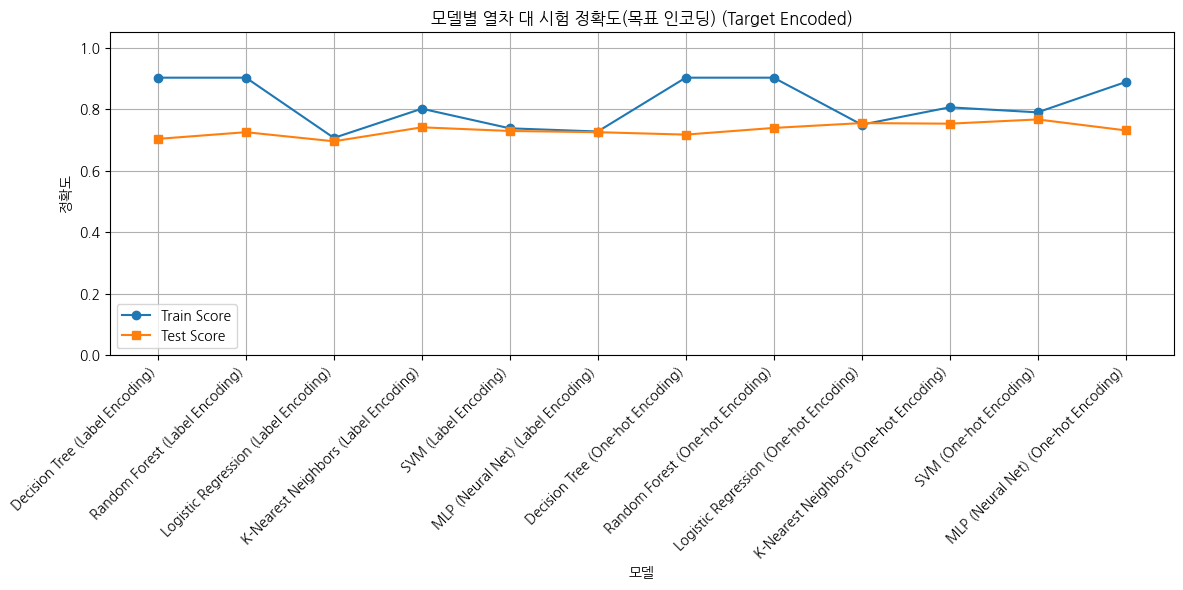

In [78]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
model_names = []

for encoding_name, data in [('Label Encoding', encoded_data_label), ('One-hot Encoding', encoded_data_onehot)]:

    data = data.copy()
    data['provstate'] = provstate_series.values
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

    prov_mean = pd.concat([X_train['provstate'], y_train], axis=1).groupby('provstate')['success'].mean()
    X_train['provstate_enc'] = X_train['provstate'].map(prov_mean)
    X_test['provstate_enc'] = X_test['provstate'].map(prov_mean)
    X_train.drop('provstate', axis=1, inplace=True)
    X_test.drop('provstate', axis=1, inplace=True)

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'SVM': SVC(),
        'MLP (Neural Net)': MLPClassifier(max_iter=500)
    }

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        train_score = model.score(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)

        model_names.append(f"{model_name} ({encoding_name})")
        train_scores.append(train_score)
        test_scores.append(test_score)

# 🔽 시각화: 꺾은선 그래프
plt.figure(figsize=(12, 6))
plt.plot(model_names, train_scores, marker='o', label='Train Score')
plt.plot(model_names, test_scores, marker='s', label='Test Score')
plt.title("모델별 열차 대 시험 정확도(목표 인코딩) (Target Encoded)")
plt.xlabel("모델")
plt.ylabel("정확도")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 모델링 - 범주형 변수 모두 타겟인코딩

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# 실험할 변수 목록
target_encoding_candidates = ['attacktype1_txt',
    'targtype1_txt', 'weaptype1_txt', 'provstate']

results = []

for te_var in target_encoding_candidates:
    # base 데이터프레임
    X = uk_model.copy()
    y = uk_df['success']

    # ✅ 타겟 인코딩 적용 전, 나머지는 라벨인코딩 처리
    encoded = X.drop(columns=[te_var]).copy()
    le = LabelEncoder()
    for col in encoded.columns:
        encoded[col] = le.fit_transform(encoded[col].astype(str))

    # 🔁 target 인코딩 대상 변수만 그대로 추가
    encoded[te_var] = X[te_var].copy()

    # split
    X_train, X_test, y_train, y_test = train_test_split(encoded, y, test_size=0.2, random_state=42)

    # ✅ 타겟 인코딩 적용
    mean_map = pd.concat([X_train[te_var], y_train], axis=1).groupby(te_var)['success'].mean()
    X_train[te_var + '_enc'] = X_train[te_var].map(mean_map)
    X_test[te_var + '_enc'] = X_test[te_var].map(mean_map)
    X_train.drop(columns=[te_var], inplace=True)
    X_test.drop(columns=[te_var], inplace=True)

    # ✅ MinMax Scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 모델 학습
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 결과 저장
    results.append({
        'Encoded Variable': te_var,
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

# 결과 출력
df_var_f1 = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(df_var_f1)


  Encoded Variable  F1 Score
1    targtype1_txt  0.839752
3        provstate  0.813559
0  attacktype1_txt  0.805933
2    weaptype1_txt  0.802516


In [80]:
# 범주형 변수 모두 타겟인코딩 + 트리계열
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

results_tree = []

# 인코딩 대상 변수
target_encode_cols = ['attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'provstate']
ordinal_encode_cols = ['weekday', 'month_name']

X = uk_model[target_encode_cols + ordinal_encode_cols].copy()
y = uk_df['success']

# ordinal 라벨 인코딩
for col in ordinal_encode_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 타겟 인코딩
for col in target_encode_cols:
    mean_map = pd.concat([X_train[col], y_train], axis=1).groupby(col)['success'].mean()
    X_train[col + '_enc'] = X_train[col].map(mean_map)
    X_test[col + '_enc'] = X_test[col].map(mean_map)

X_train.drop(columns=target_encode_cols, inplace=True)
X_test.drop(columns=target_encode_cols, inplace=True)

# 트리 모델
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_tree.append({
        'Model': model_name,
        'Encoding': 'Mixed Encoding',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

df_tree_mixed = pd.DataFrame(results_tree)
df_tree_mixed



,Model,Encoding,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,Mixed Encoding,0.689723,0.788235,0.759207,0.773449
1,Random Forest,Mixed Encoding,0.743083,0.789610,0.861190,0.823848


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

results_nontree = []

# 다시 동일한 인코딩
X = uk_model[target_encode_cols + ordinal_encode_cols].copy()
y = uk_df['success']

for col in ordinal_encode_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for col in target_encode_cols:
    mean_map = pd.concat([X_train[col], y_train], axis=1).groupby(col)['success'].mean()
    X_train[col + '_enc'] = X_train[col].map(mean_map)
    X_test[col + '_enc'] = X_test[col].map(mean_map)

X_train.drop(columns=target_encode_cols, inplace=True)
X_test.drop(columns=target_encode_cols, inplace=True)

# ✅ 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 비트리 모델들
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'MLP (Neural Net)': MLPClassifier(max_iter=500)
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results_nontree.append({
        'Model': model_name,
        'Encoding': 'Mixed Encoding',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

df_nontree_mixed = pd.DataFrame(results_nontree)
df_nontree_mixed

,Model,Encoding,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,Mixed Encoding,0.743083,0.748330,0.951841,0.837905
1,K-Nearest Neighbors,Mixed Encoding,0.750988,0.785894,0.883853,0.832000
2,SVM,Mixed Encoding,0.749012,0.742489,0.980170,0.844933
3,MLP (Neural Net),Mixed Encoding,0.737154,0.748869,0.937677,0.832704


In [82]:
final_mixed_results = pd.concat([df_tree_mixed, df_nontree_mixed])
final_mixed_sorted = final_mixed_results.sort_values(by='F1 Score', ascending=False)
print("범주형 모두 타겟인코딩했을 때")
print("*"*60)
print(final_mixed_sorted)

범주형 모두 타겟인코딩했을 때
************************************************************
                 Model        Encoding  Accuracy  Precision    Recall  \
2                  SVM  Mixed Encoding  0.749012   0.742489  0.980170   
0  Logistic Regression  Mixed Encoding  0.743083   0.748330  0.951841   
3     MLP (Neural Net)  Mixed Encoding  0.737154   0.748869  0.937677   
1  K-Nearest Neighbors  Mixed Encoding  0.750988   0.785894  0.883853   
1        Random Forest  Mixed Encoding  0.743083   0.789610  0.861190   
0        Decision Tree  Mixed Encoding  0.689723   0.788235  0.759207   

   F1 Score  
2  0.844933  
0  0.837905  
3  0.832704  
1  0.832000  
1  0.823848  
0  0.773449  


## 모델링 - f1 score 상위2개만 타겟인코딩(hybrid)


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# 변수 정의
target_encoding_vars = ['targtype1_txt', 'weaptype1_txt']
onehot_encoding_vars = ['attacktype1_txt', 'provstate']
label_encoding_vars = ['weekday', 'month_name']

# 복사본
X = uk_model[target_encoding_vars + onehot_encoding_vars + label_encoding_vars].copy()
y = uk_df['success']

# ✅ 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
for col in label_encoding_vars:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# ✅ 원핫 인코딩
X = pd.get_dummies(X, columns=onehot_encoding_vars)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 타겟 인코딩
for col in target_encoding_vars:
    target_map = pd.concat([X_train[col], y_train], axis=1).groupby(col)['success'].mean()
    X_train[col + '_enc'] = X_train[col].map(target_map)
    X_test[col + '_enc'] = X_test[col].map(target_map)
    X_train.drop(columns=[col], inplace=True)
    X_test.drop(columns=[col], inplace=True)

# 모델 훈련
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results_tree = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_tree.append({
        'Model': name,
        'Encoding': 'Hybrid',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

df_tree_hybrid = pd.DataFrame(results_tree)
df_tree_hybrid


,Model,Encoding,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,Hybrid,0.685771,0.793939,0.742210,0.767204
1,Random Forest,Hybrid,0.739130,0.787013,0.858357,0.821138


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

X = uk_model[target_encoding_vars + onehot_encoding_vars + label_encoding_vars].copy()
y = uk_df['success']

for col in label_encoding_vars:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X = pd.get_dummies(X, columns=onehot_encoding_vars)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for col in target_encoding_vars:
    target_map = pd.concat([X_train[col], y_train], axis=1).groupby(col)['success'].mean()
    X_train[col + '_enc'] = X_train[col].map(target_map)
    X_test[col + '_enc'] = X_test[col].map(target_map)
    X_train.drop(columns=[col], inplace=True)
    X_test.drop(columns=[col], inplace=True)

# 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 비트리 기반 모델
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'MLP (Neural Net)': MLPClassifier(max_iter=500)
}

results_nontree = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results_nontree.append({
        'Model': name,
        'Encoding': 'Hybrid',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

df_nontree_hybrid = pd.DataFrame(results_nontree)
df_nontree_hybrid

,Model,Encoding,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,Hybrid,0.752964,0.755605,0.954674,0.843554
1,K-Nearest Neighbors,Hybrid,0.756917,0.796392,0.875354,0.834008
2,SVM,Hybrid,0.758893,0.746269,0.991501,0.851582
3,MLP (Neural Net),Hybrid,0.741107,0.768116,0.900850,0.829205


In [85]:
final_hybrid_results = pd.concat([df_tree_hybrid, df_nontree_hybrid])
final_hybrid_sorted = final_hybrid_results.sort_values(by='F1 Score', ascending=False)
print("모든 인코딩 종류 다 섞었을때")
print("*"*60)
print(final_hybrid_sorted)

모든 인코딩 종류 다 섞었을때
************************************************************
                 Model Encoding  Accuracy  Precision    Recall  F1 Score
2                  SVM   Hybrid  0.758893   0.746269  0.991501  0.851582
0  Logistic Regression   Hybrid  0.752964   0.755605  0.954674  0.843554
1  K-Nearest Neighbors   Hybrid  0.756917   0.796392  0.875354  0.834008
3     MLP (Neural Net)   Hybrid  0.741107   0.768116  0.900850  0.829205
1        Random Forest   Hybrid  0.739130   0.787013  0.858357  0.821138
0        Decision Tree   Hybrid  0.685771   0.793939  0.742210  0.767204


## ✅최종 모델 선택

provstate만 타겟인코딩 + onehot 인코딩의 SVM, 그 다음은 logreg




# SVM 튜닝

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report
import pandas as pd

# ✅ 인코딩된 데이터 선택: 여기서는 label or onehot 중 하나 선택
data = encoded_data_onehot.copy()  # 또는

# ✅ provstate 붙이기
data['provstate'] = provstate_series.values
y = uk_df['success']

# ✅ train/test 분리
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# ✅ provstate만 타겟 인코딩
prov_mean = pd.concat([X_train['provstate'], y_train], axis=1).groupby('provstate')['success'].mean()
X_train['provstate_enc'] = X_train['provstate'].map(prov_mean)
X_test['provstate_enc'] = X_test['provstate'].map(prov_mean)

# 원래 provstate 제거
X_train.drop('provstate', axis=1, inplace=True)
X_test.drop('provstate', axis=1, inplace=True)

# ✅ MinMaxScaler 적용
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SVM + GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

# ✅ 결과 확인
print("📌 Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("✅ Test F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
📌 Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
✅ Test F1 Score: 0.8535980148883374
              precision    recall  f1-score   support

           0       0.83      0.29      0.43       153
           1       0.76      0.97      0.85       353

    accuracy                           0.77       506
   macro avg       0.79      0.63      0.64       506
weighted avg       0.78      0.77      0.72       506



⚠️ 실패감지능력이 너무 낮은듯

In [87]:
# svm + 가중치 적용학습
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ✅ class_weight='balanced' 적용
balanced_svm = SVC(C=1, kernel='rbf', gamma='scale', class_weight='balanced')
balanced_svm.fit(X_train_scaled, y_train)

# ✅ 예측 및 평가
y_pred_balanced = balanced_svm.predict(X_test_scaled)

print("✅ [Balanced SVM] Test F1 Score:", f1_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


✅ [Balanced SVM] Test F1 Score: 0.781010719754977
              precision    recall  f1-score   support

           0       0.52      0.71      0.60       153
           1       0.85      0.72      0.78       353

    accuracy                           0.72       506
   macro avg       0.69      0.71      0.69       506
weighted avg       0.75      0.72      0.73       506



✅ 이렇게 하면 f1 score가 너무 낮아짐.

✅ 우리 목적을 생각해봤을 때, 실패를 잡는 것은 크게 중요하지 않을 것 같음, 성공인데 실패라고 예측해서 위험한 테러의 성공을 놓치는것이 정말 위험한 것!!

✅ 따라서, 성공을 잘 잡는, weight_balanced가 없는 기본 SVM 모델을 최우선으로 가지고 감

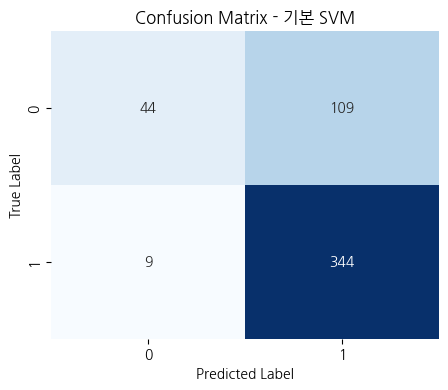

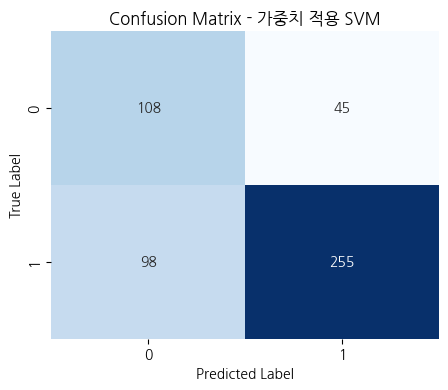

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# ✅ 기본 SVM 예측 결과 시각화
y_pred_default = best_model.predict(X_test_scaled)
plot_conf_matrix(y_test, y_pred_default, title="Confusion Matrix - 기본 SVM")

# ✅ Balanced SVM 예측 결과 시각화
plot_conf_matrix(y_test, y_pred_balanced, title="Confusion Matrix - 가중치 적용 SVM")


- [0,0]	실제 실패(0)이고 실패라고 예측함 → True Negative
- [0,1]	실제 실패인데 성공으로 예측함 → False Positive
- [1,0]	실제 성공인데 실패로 예측함 → False Negative (위험!!)
- [1,1]	실제 성공이고 성공으로 예측함 → True Positive

기본 SVM모델이 FN이 더 낮고, TP가 더 높음
실제로는 실패할 사건도 성공으로 예측하는 횟수도 꽤나 높았지만 혹시 모를 상황에  대비하는거니까 이건 오좋 아닐까?!? (인력낭비, 예산 낭비 같은건 있을 수 있겠지만)

➡️ 기본 SVM 채택!!

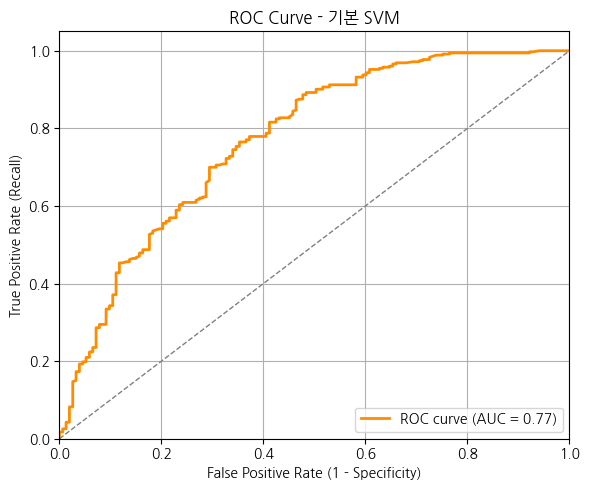

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ✅ predict_proba가 없어서 decision_function 사용 (SVM 특징!)
y_scores = best_model.decision_function(X_test_scaled)

# ✅ ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# ✅ 시각화
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # 랜덤 분류 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - 기본 SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ [VotingClassifier] F1 Score: 0.8538461538461538
              precision    recall  f1-score   support

           0       0.75      0.39      0.51       153
           1       0.78      0.94      0.85       353

    accuracy                           0.77       506
   macro avg       0.76      0.66      0.68       506
weighted avg       0.77      0.77      0.75       506



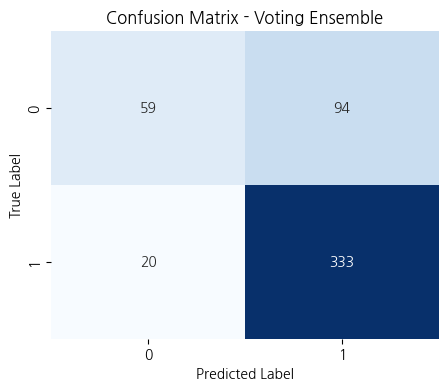

In [90]:
# 앙상블
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ✅ 앙상블 구성 (확률 기반 soft voting)
ensemble = VotingClassifier(
    estimators=[
        ('svc', SVC(C=1, gamma='scale', kernel='rbf', probability=True)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ],
    voting='soft',  # 확률 평균 기반
    n_jobs=-1
)

# 학습
ensemble.fit(X_train_scaled, y_train)

# 예측
y_pred_ensemble = ensemble.predict(X_test_scaled)

# 성능 평가
print("✅ [VotingClassifier] F1 Score:", f1_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))

# 혼동 행렬 시각화
plot_conf_matrix(y_test, y_pred_ensemble, title="Confusion Matrix - Voting Ensemble")


✅ [StackingClassifier] F1 Score: 0.8534704370179949
              precision    recall  f1-score   support

           0       0.74      0.39      0.51       153
           1       0.78      0.94      0.85       353

    accuracy                           0.77       506
   macro avg       0.76      0.67      0.68       506
weighted avg       0.77      0.77      0.75       506



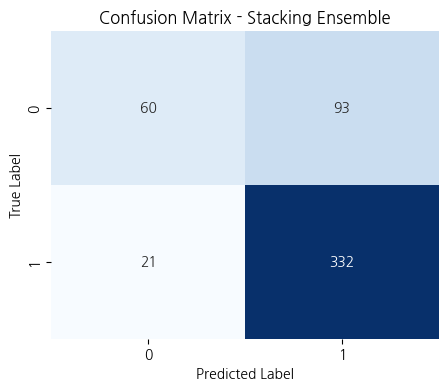

In [91]:
#FP,FN둘다 낮추고 싶은뎅---> stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ✅ 개별 모델들 (확률 출력 가능하도록 설정)
base_estimators = [
    ('svc', SVC(C=1, kernel='rbf', gamma='scale', probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# ✅ 최종 메타 모델: Logistic Regression
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# ✅ 스태킹 앙상블 구성
stack_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1,
    passthrough=False  # True로 바꾸면 원본 feature도 같이 사용
)

# ✅ 학습
stack_model.fit(X_train_scaled, y_train)

# ✅ 예측
y_pred_stack = stack_model.predict(X_test_scaled)

# ✅ 평가
print("✅ [StackingClassifier] F1 Score:", f1_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

# ✅ Confusion Matrix
plot_conf_matrix(y_test, y_pred_stack, title="Confusion Matrix - Stacking Ensemble")


#### stacking을 선택한 이유

 FP도 낮추고, FN도 줄일 수 있는 "가장 효율적 조합"을 찾고 싶음

 그래서 기본 모델들의 강점을 가져가면서 여러 모델 결과를 또 다른 모델로 학습해 최적화할 수 있는 Stacking방법 선택

→ 최종 메타 모델이 이걸 “어떨 때는 A, 어떨 때는 B”처럼 학습 기반 판단 가능함


## 모델 간 핵심 지표 비교



| 모델                 | FP (0→1) | FN (1→0) | F1 Score (class 1) | Recall (class 1) |
|----------------------|----------|----------|---------------------|------------------|
| **Default SVM**       | 103      | **10**   | 0.86                | **0.97**         |
| Voting 앙상블        | 95       | 20       | 0.85                | 0.94             |
| **Stacking 앙상블** | 94       | 19       | **0.86**            | 0.95             |


# 모델링 결과 해석

In [92]:
!pip install shap

## SHAP

PermutationExplainer explainer: 507it [15:12,  1.80s/it]
<ipython-input-93-a02f64816bd7>:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)


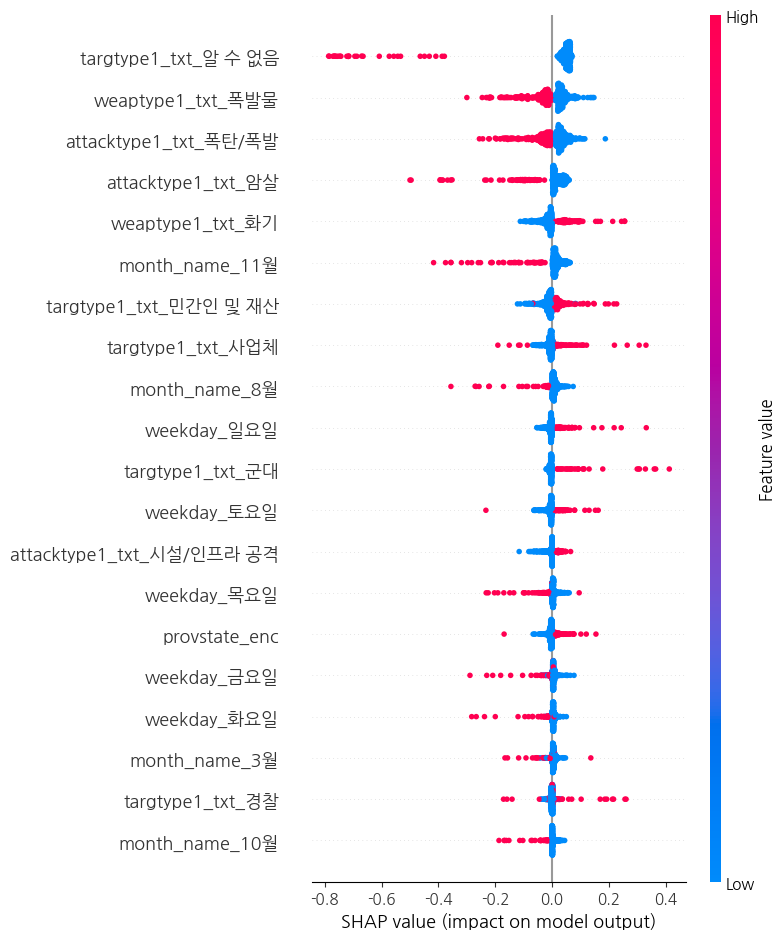

In [93]:
import shap
import pandas as pd

# Step 1. TreeExplainer 대신 KernelExplainer 사용 (모든 모델 호환)
explainer = shap.Explainer(stack_model.predict, X_test_scaled)

# Step 2. SHAP 값 계산
shap_values = explainer(X_test_scaled)

# Step 3. 요약 시각화
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)


X축: 오른쪽: 테러 성공에 영향을 주는 요인

색깔: 입력값이 크면 붉음

상단에 있는 변수가 중요한 변수

# SHAP 해석
SHAP 결과해석을 통해 테러 대응 전략 수립 시 어떤 조건에서 테러가 성공하거나 좌절하기 쉬운지에 대한 인사이트를 얻을 수 있었다.

SVM을 활용한 영국 테러 성공 여부 예측 모델에서는 <U>공격 대상 유형, 공격/무기 수법, 시간적 요인, 지역 변수</U> 등이 예측에 핵심적인 역할을 하고 있음을 확인했다.




(느낀점🌱)

범주형 변수 인코딩 기법 선택이 이러한 결과 해석에 중요하며, 원-핫 인코딩을 통해 개별 범주의 영향력을 명확히 확인할 수 있었다


## 실패와 강하게 연결된 변수들

1. 타깃 유형이 '알 수 없음'인 경우

    타깃이 명확하지 않거나 계획이 미흡한 경우, 실행 단계에서 저지되거나 원하는대로 실행되지 않아 목적을 이루지 못해 실패라고 판단할 가능성이 높은듯 하다.

2. 무기 유형으로 폭발물이 사용된 경우,

    예상과 달리 성공보다는 실패와 더 강하게 연결되어 있었다. 이는 영국 내 폭발물에 대한 사전 탐지 및 대응 체계가 잘 갖춰져 있음을 시사하며, 폭발물 공격이 자주 발생하지만 그만큼 자주 저지되었음을 의미할 수 있다.

3. 공격 방식이 폭탄/폭발이거나 암살인 경우,

    실패 가능성이 높다. 두 방식 모두 고위험 표적을 겨냥하거나 대중적 장소를 대상으로 하지만, 실행 난이도나 보안 체계로 인해 성공률이 낮게 나타난 것으로 보인다.

4. 11월에 발생한 테러는 모델상 실패률이 높다.

## 성공과 강하게 연결된 변수들

1. 무기 유형이 화기일 경우,

    모델은 테러의 성공률을 높이는 요소로 판단했다.은밀성과 기동성이 높아 폭발물보다 탐지가 어려우며, 인명 피해로 이어질 가능성이 크기 때문에 테러의 목적 달성률이 높은 것으로 해석해본다.

2. 타깃이 민간인 또는 사업체인 경우,
    
    즉 **소프트 타깃**일수록 테러의 성공 확률이 높은 경향을 보였다. 이는 보안이 허술하거나 개방된 공간에서 이루어진 테러가 실행 성공으로 이어지는 경우가 많음을 의미한다.

3. 8월에 발생한 테러는 성공과 연관되어 있었다.
    
    여름철 관광 인파 증가, 야외행사 등으로 인해 보안이 느슨한 시기를 노린 공격이 성공했을 가능성이 있다.

4. 요일 변수에서도 토요일과 일요일이 성공과 유의미한 관련성을 보였다.

    주말은 일반적으로 사람들의 활동량이 많고, 공공장소가 혼잡해지므로 테러 실행이 용이해지는 환경이 형성되서라고 생각된다.

5. 타깃이 군대인 경우에도 성공률이 높게 나타났다.
    
    일반적인 예측과는 다소 다른 결과이다. 군 관련 시설 중 경계가 취약한 외부 이동 경로나 보급 라인 혹은 사각지대등에서 공격이 이루어진 가능성을 추측해볼 수 있다.

#최종 인사이트

영국정부의 2025년 시행 예정인 Terrorism (Protection of Premises) Act (Martyn’s Law)을 통해 테러에 취약한 장소(특히 대규모 행사장, 다중이용시설)의 보안 수준을 높이고 조직의 준비성을 강화할 계획을 확인했다.

출처: https://homeofficemedia.blog.gov.uk/2025/04/03/martyns-law-factsheet/

---




## 💡전략1 : 소형 공간 맞춤형 대응 매뉴얼 세분화

**📜 Martyn’s Law:**

>현행법상 200인 이상 시설만 ‘Standard Duty Premises’로 포함


하지만 실제로는 인원이 적어도 소프트 타깃이면 고위험일 수 있음

**✅ 개선방안 제안:**

> 시설 규모가 아닌 "공격 유형 × 대상 특성" 기준으로 Standard 적용 여부 판단


    **Standard Duty Premises: 테러 위협으로부터 대중을 보호하기 위해 특정 규모 이상의 시설에 대해 의무적으로 대비 절차를 갖추도록 법적으로 요구받는 시설

---

## 💡전략2: 공격 유형별 대응 매뉴얼 다각화
- 도출한 인사이트에서 총기 공격은 성공률 ↑ / 폭탄 공격은 실패 ↑

    → 수법별 대응력 차이 존재

**📜 Martyn’s Law:**

> 법안은 "공공보호 절차"를 명시하지만, 공격 유형별 시나리오 차등 언급은 없음

**✅ 개선방안 제안:**

> 공격 수단별 대응 시나리오를  매뉴얼에 포함

> 시설을 전략1에서의 공격 유형 x 대상 특성과 같은 방식으로 분류하여, 각각의 시설이 자신의 유형에 맞는 시나리오를 2~3개 정도만 숙지하면 되도록 단순화하는 것이 필요할 듯하다(실행력과 활용력을 높이기 위해)

예시)

- 총기: 은폐, 차단 우선 / 직원 피난 루트 중심

- 폭발물: 즉시 경고 방송 / 출입통제 및 2차 피해 방지 우선 / 폭발 테러 발생 위험 지역 근처에 소방서나 경찰서같은 시설 배치

---

## 💡전략3: 요일 기반 보안 점검 가이드라인 마련

**📜 Martyn’s Law:**

>인원 수 중심 분류 외에는 시간·시점에 대한 고려 없음


**✅ 개선방안 제안:**

> 요일/시간대별 위험 점수를 산출하는 내부 대시보드 시스템 구축하여 인력을 요일/시간대별로 효율적으로 운영할 수 있는 보안 시스템 도입

>테러 위협 등급을 특정 월과 요일을 기준으로 **차등적으로 운영**하여 경계 강화를 효과적으로 배치

---
## 💡전략4: 군 관련 시설의 비공식 접점 보완

**📜 Martyn’s Law:**

>민간 중심 법령이어서 군 시설에 관한 내용은 없지만, 하드타깃이라 간과됐던 군 부대에를 대상으로 한 테러가 성공률이 높게 나옴.


**✅ 개선방안 제안:**

> Enhanced Duty Premises에 군 연계 민간 시설도 포함하여 군과 접점이 있는 민간시설들(계약시설, 보급기지, 외주 업체 등)뿐 아니라 군 시설 또한 함께 보호


#왜 영국이 서유럽 국가 중 테러 성공률이 가장 낮을까? (추가 서치 내용 정리)


## 1. 사전 차단 능력

2017년 이래 영국 정부가 후반부에 진입한(late-stage) 테러 계획 43건을 차단함

➡️ 매우 높은 대응력과 정보력이 있어서 가능한 것 같음 (영국은 테러방지집단이 따로 있음- 이름 찾기).

##2. 법적 대응 전략과 명확한 역할 분담
영국의 새로운 법률(Martyn’s Law)을 보면보안 책임을 명확히 하고 시설별 맞춤형 대응책을 법적으로 요구하고 있는 것을 확인할 수 있음

➡️ 시설 관리자와 지역 책임자가 사전에 테러 대응책을 마련하고 훈련하여, 실제 테러 발생 시 혼란을 최소화하는 효과를 거둘 수 있었던 것이라고 생각함

## 3. 지속적인 테러 대비 훈련 및 교
영국 정부는 테러 위협 수준("Substantial")으로 설정하여 국민과 기관의 대비 훈련을 일상화하고 있음

##4. 보안 인프라 구축
영국의 테러 이력..?을 살펴보았을 때 대규모 테러가 있었음- IRA테러
그래서 이미 주요 시설과 지역의 보안 시스템이 잘 갖추어져있었을 것이라고 추측

---


## ELI5
- ELI5실행결과, 성공과 실패에 영향을 주는 변수들을 분리해서 확인할 수 없었기 때문에, SHAP의 시각화 결과만 활용


In [94]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.3 MB/s eta 0:00:00


In [95]:
import eli5
from eli5.sklearn import PermutationImportance

# 1. PermutationImportance 객체 생성 (랜덤성 있음 → random_state 고정 추천)
perm = PermutationImportance(stack_model, random_state=42)
perm.fit(X_test_scaled, y_test)  # y_test는 실제 타겟값

# 2. 변수 중요도 시각화
eli5.show_weights(perm, feature_names=X_test.columns.tolist())


Weight,Feature
0.0372 ± 0.0123,targtype1_txt_알 수 없음
0.0154 ± 0.0101,weaptype1_txt_폭발물
0.0138 ± 0.0127,weaptype1_txt_화기
0.0138 ± 0.0180,attacktype1_txt_암살
0.0119 ± 0.0100,targtype1_txt_민간인 및 재산
0.0119 ± 0.0090,month_name_11월
0.0111 ± 0.0054,targtype1_txt_사업체
0.0083 ± 0.0046,weekday_목요일
0.0071 ± 0.0019,targtype1_txt_공항 및 항공기
0.0063 ± 0.0072,month_name_8월


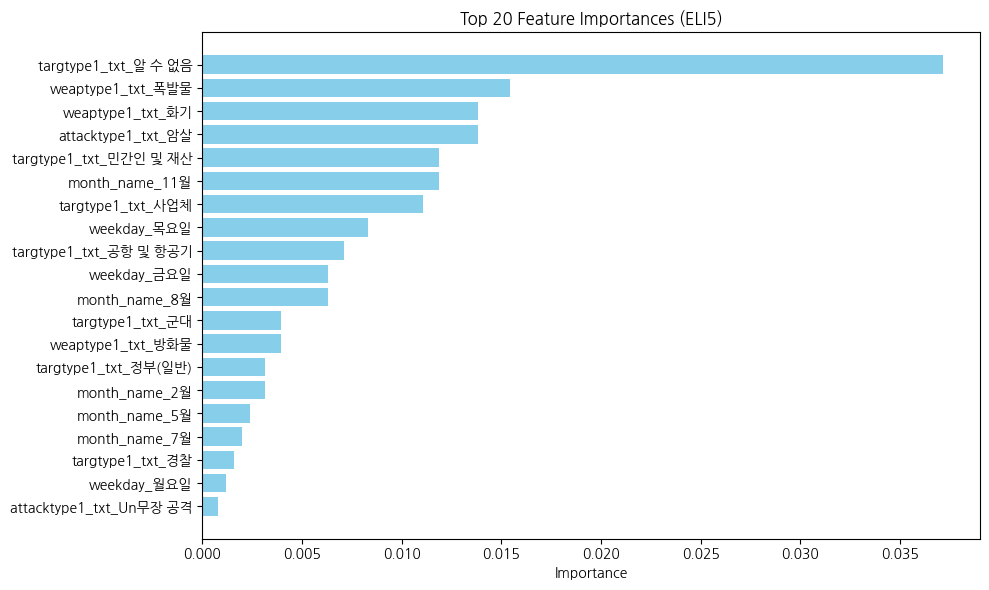

In [96]:
import eli5
from eli5.sklearn import PermutationImportance
import pandas as pd
import matplotlib.pyplot as plt

# Permutation Importance 계산
perm = PermutationImportance(stack_model, random_state=42)
perm.fit(X_test_scaled, y_test)

# 결과를 pandas DataFrame으로 변환
df_weights = eli5.explain_weights_df(perm, feature_names=X_test.columns.tolist())

# 상위 20개만 시각화
top_weights = df_weights.head(20)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_weights['feature'], top_weights['weight'], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (ELI5)")
plt.gca().invert_yaxis()  # 가장 중요한 feature가 위로 오게
plt.tight_layout()
plt.show()
